<a href="https://colab.research.google.com/github/ruudvan03/Portafolio-Evidencias/blob/main/Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREPARACION DEL ENTORNO**

In [1]:
!nvidia-smi

Wed Dec 10 15:12:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00


## **INSTALACIÓN DE YOLOV8**

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.3/112.6 GB disk)

OS                     Linux-6.6.105+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.12
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    12.67 GB
Disk                   38.3/112.6 GB
CPU                    Intel Xeon CPU @ 2.20GHz
CPU count              2
GPU                    Tesla T4, 15095MiB
GPU count              1
CUDA                   12.6

numpy                  ✅ 2.0.2>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
opencv-python          ✅ 4.12.0.88>=4.6.0
pillow                 ✅ 11.3.0>=7.1.2
pyyaml                 ✅ 6.0.3>=5.3.1
requests               ✅ 2.32.4>=2.23.0
scipy                  ✅ 1.16.3>=1.4.1
torch                  ✅ 2.9.0+cu126>=1.8.0
torch                  ✅ 2.9.0+cu126!=2.4.0,>=1.8.0; sys_platform == "win32"


# **DESCOMPRIMIMOS EL .ZIP DEL DATASET**

In [6]:
import zipfile
import os
from IPython.display import display, HTML

zip_file_path = '/content/ObjetosPerdidos.v4i.yolov8.zip'
extraction_path = '/content/imagenes'

print(f"Verifying file type for: {zip_file_path}")
!file "$zip_file_path"

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
    print(f"Archivo descomprimido en: {extraction_path}")
except zipfile.BadZipFile:
    print(f"Error: El archivo '{zip_file_path}' no es un archivo ZIP válido o está corrupto.")
    print("Por favor, asegúrate de que el archivo ZIP sea correcto y no esté dañado.")
except FileNotFoundError:
    print(f"Error: El archivo '{zip_file_path}' no fue encontrado.")
    print("Por favor, verifica la ruta del archivo.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Verifying file type for: /content/ObjetosPerdidos.v4i.yolov8.zip
/content/ObjetosPerdidos.v4i.yolov8.zip: Zip archive data, at least v2.0 to extract, compression method=deflate
Archivo descomprimido en: /content/imagenes


# **Entrenamiento del modelo YOLOv8 con el dataset que acabamos de descomprimir.**
*50 epocas*

In [7]:
from ultralytics import YOLO
import os

# Cargar un modelo YOLOv8 pre-entrenado
model = YOLO('yolov8n.pt')

# Definir la ruta al archivo data.yaml
data_yaml_path = os.path.join(extraction_path, 'data.yaml')

# Verificar si el archivo data.yaml existe
if not os.path.exists(data_yaml_path):
    print(f"Error: No se encontró el archivo data.yaml en {data_yaml_path}")
else:
    # Entrenar el modelo
    print(f"Entrenando el modelo con la configuración del archivo: {data_yaml_path}")
    results = model.train(data=data_yaml_path, epochs=50, imgsz=640)

    print("¡Entrenamiento completado!")



Entrenando el modelo con la configuración del archivo: /content/imagenes/data.yaml
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/imagenes/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, op

**Ahora que el modelo ha sido entrenado, podemos usarlo para realizar predicciones en nuevas imágenes. Utilizaremos el modelo 'best.pt' que se guardó automáticamente después del entrenamiento para hacer inferencia en una imagen de ejemplo.**

Saving WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg to WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg
Imagen subida: WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg

image 1/1 /content/WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg: 640x480 1 Celular, 1 Llaves, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict12
Directorio de guardado de resultados: /content/runs/detect/predict12
Archivos encontrados en el directorio: ['WhatsApp Image 2025-12-09 at 8.01.06 PM.jpg']


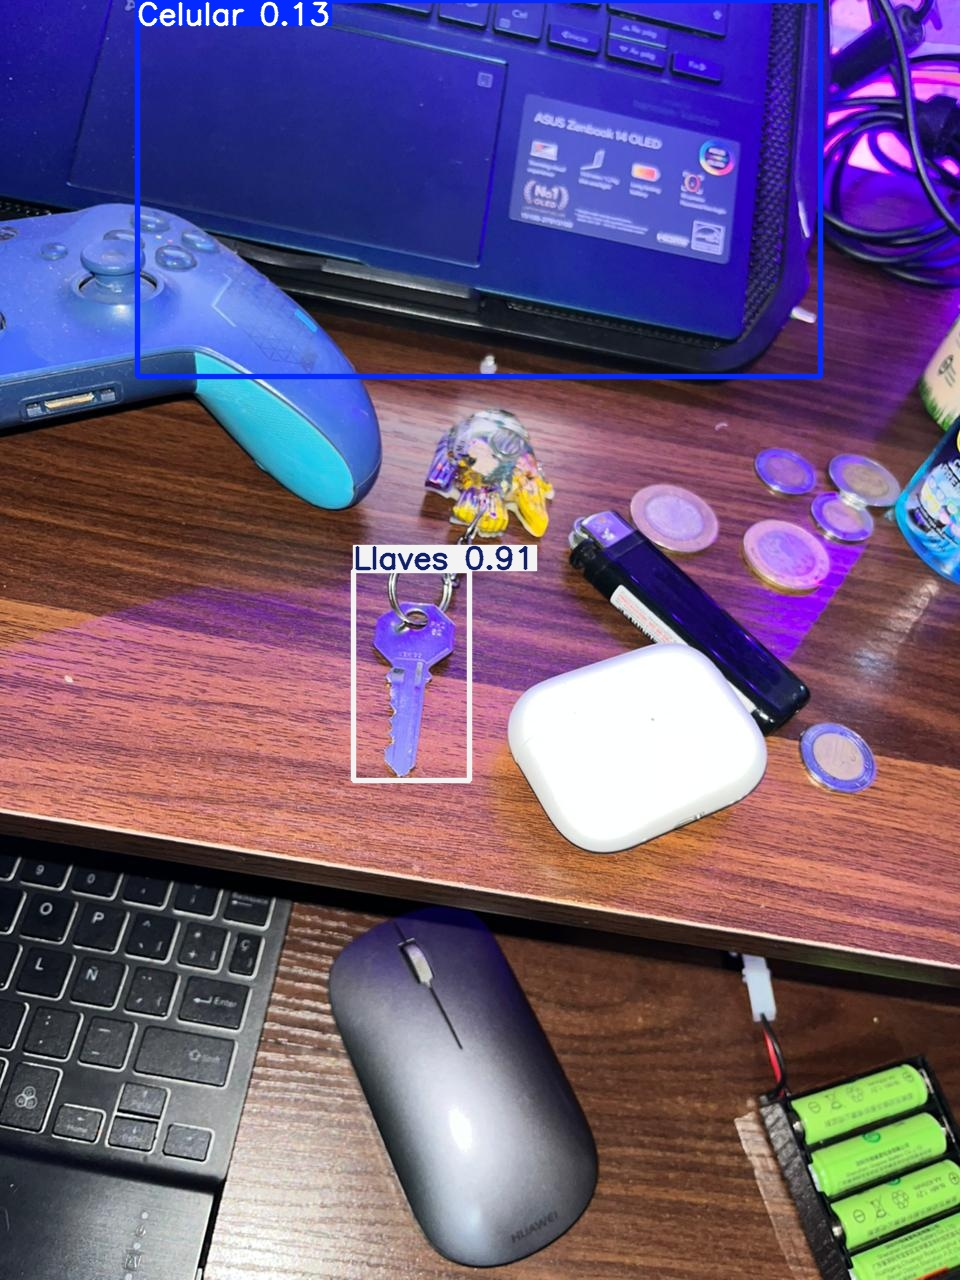

Imagen con detecciones guardada en: /content/runs/detect/predict12/WhatsApp Image 2025-12-09 at 8.01.06 PM.jpg


In [25]:
from google.colab import files
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Cargar el modelo entrenado
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Subir archivo
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Imagen subida: {filename}')
    # Guardar la imagen subida temporalmente
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    # Realizar inferencia en la imagen subida
    results = model.predict(source=filename, save=True, conf=0.1) # Lowered confidence threshold

    # Mostrar la imagen con las detecciones
    predicted_image_dir = results[0].save_dir # Get the directory where results are saved

    print(f"Directorio de guardado de resultados: {predicted_image_dir}")
    if os.path.exists(predicted_image_dir):
        saved_files = os.listdir(predicted_image_dir)
        print(f"Archivos encontrados en el directorio: {saved_files}")

        found_image_file = None
        for f in saved_files:
            if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
                found_image_file = f
                break

        if found_image_file:
            predicted_image_path = os.path.join(predicted_image_dir, found_image_file)
            display(Image(filename=predicted_image_path, width=600))
            print(f"Imagen con detecciones guardada en: {predicted_image_path}")
        else:
            print("No se encontró ninguna imagen con detecciones en el directorio de guardado.")
            print(f"Directorio revisado: {predicted_image_dir}")
    else:
        print("El directorio de guardado no existe, lo cual es inesperado.")

    # Eliminar el archivo temporal para limpiar
    os.remove(filename)

Visualizando resultados del entrenamiento: /content/runs/detect/train

--- Mostrando results.png ---


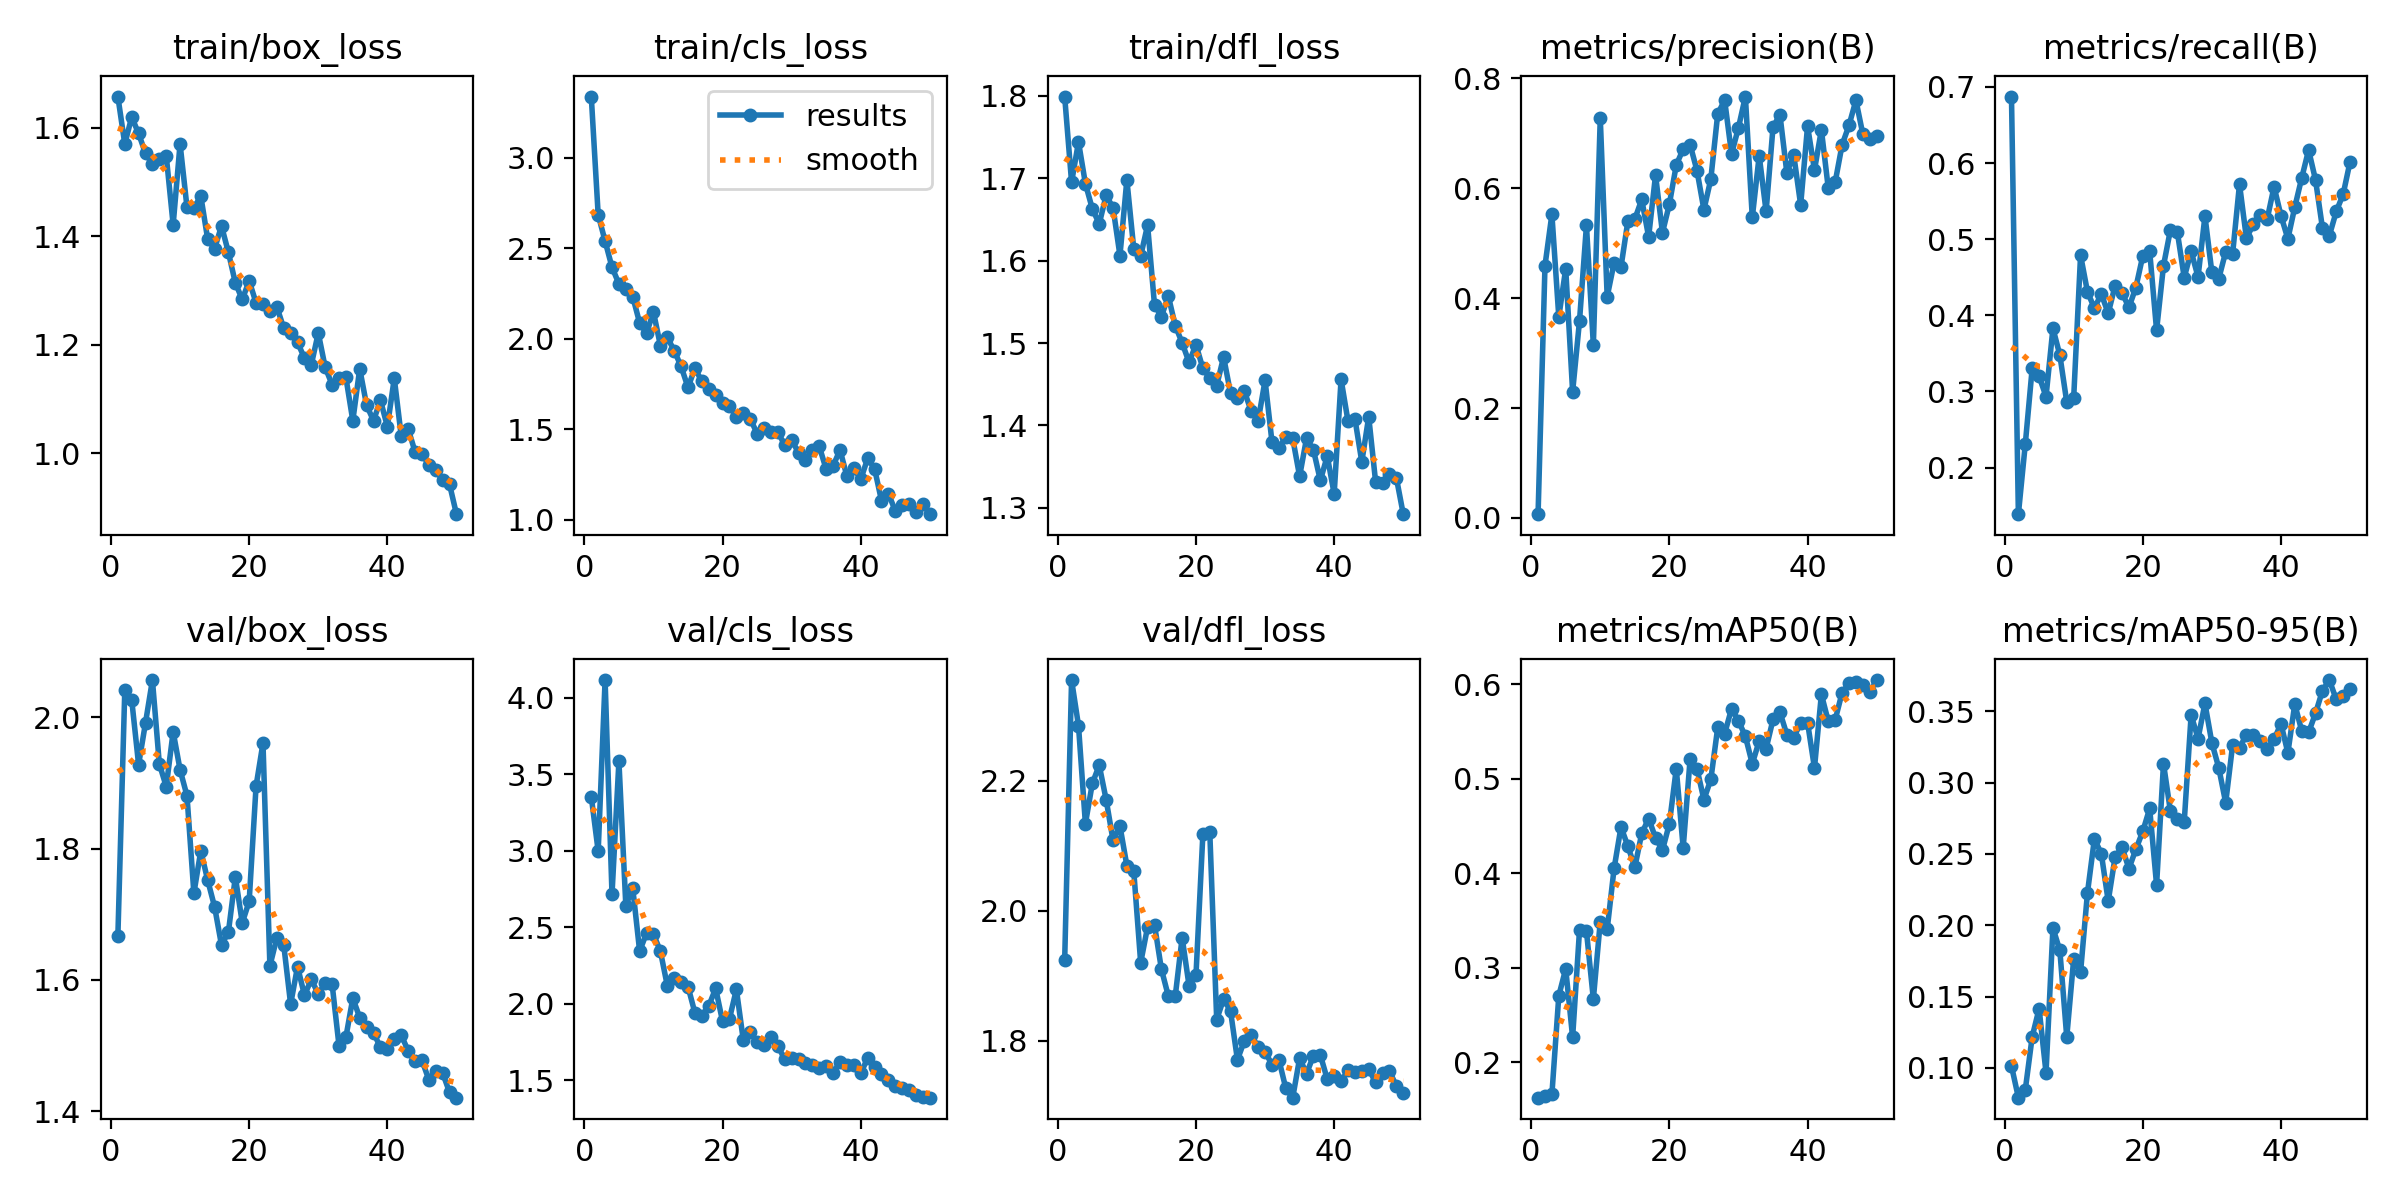

Advertencia: F1_curve.png no encontrado en /content/runs/detect/train

--- Mostrando confusion_matrix.png ---


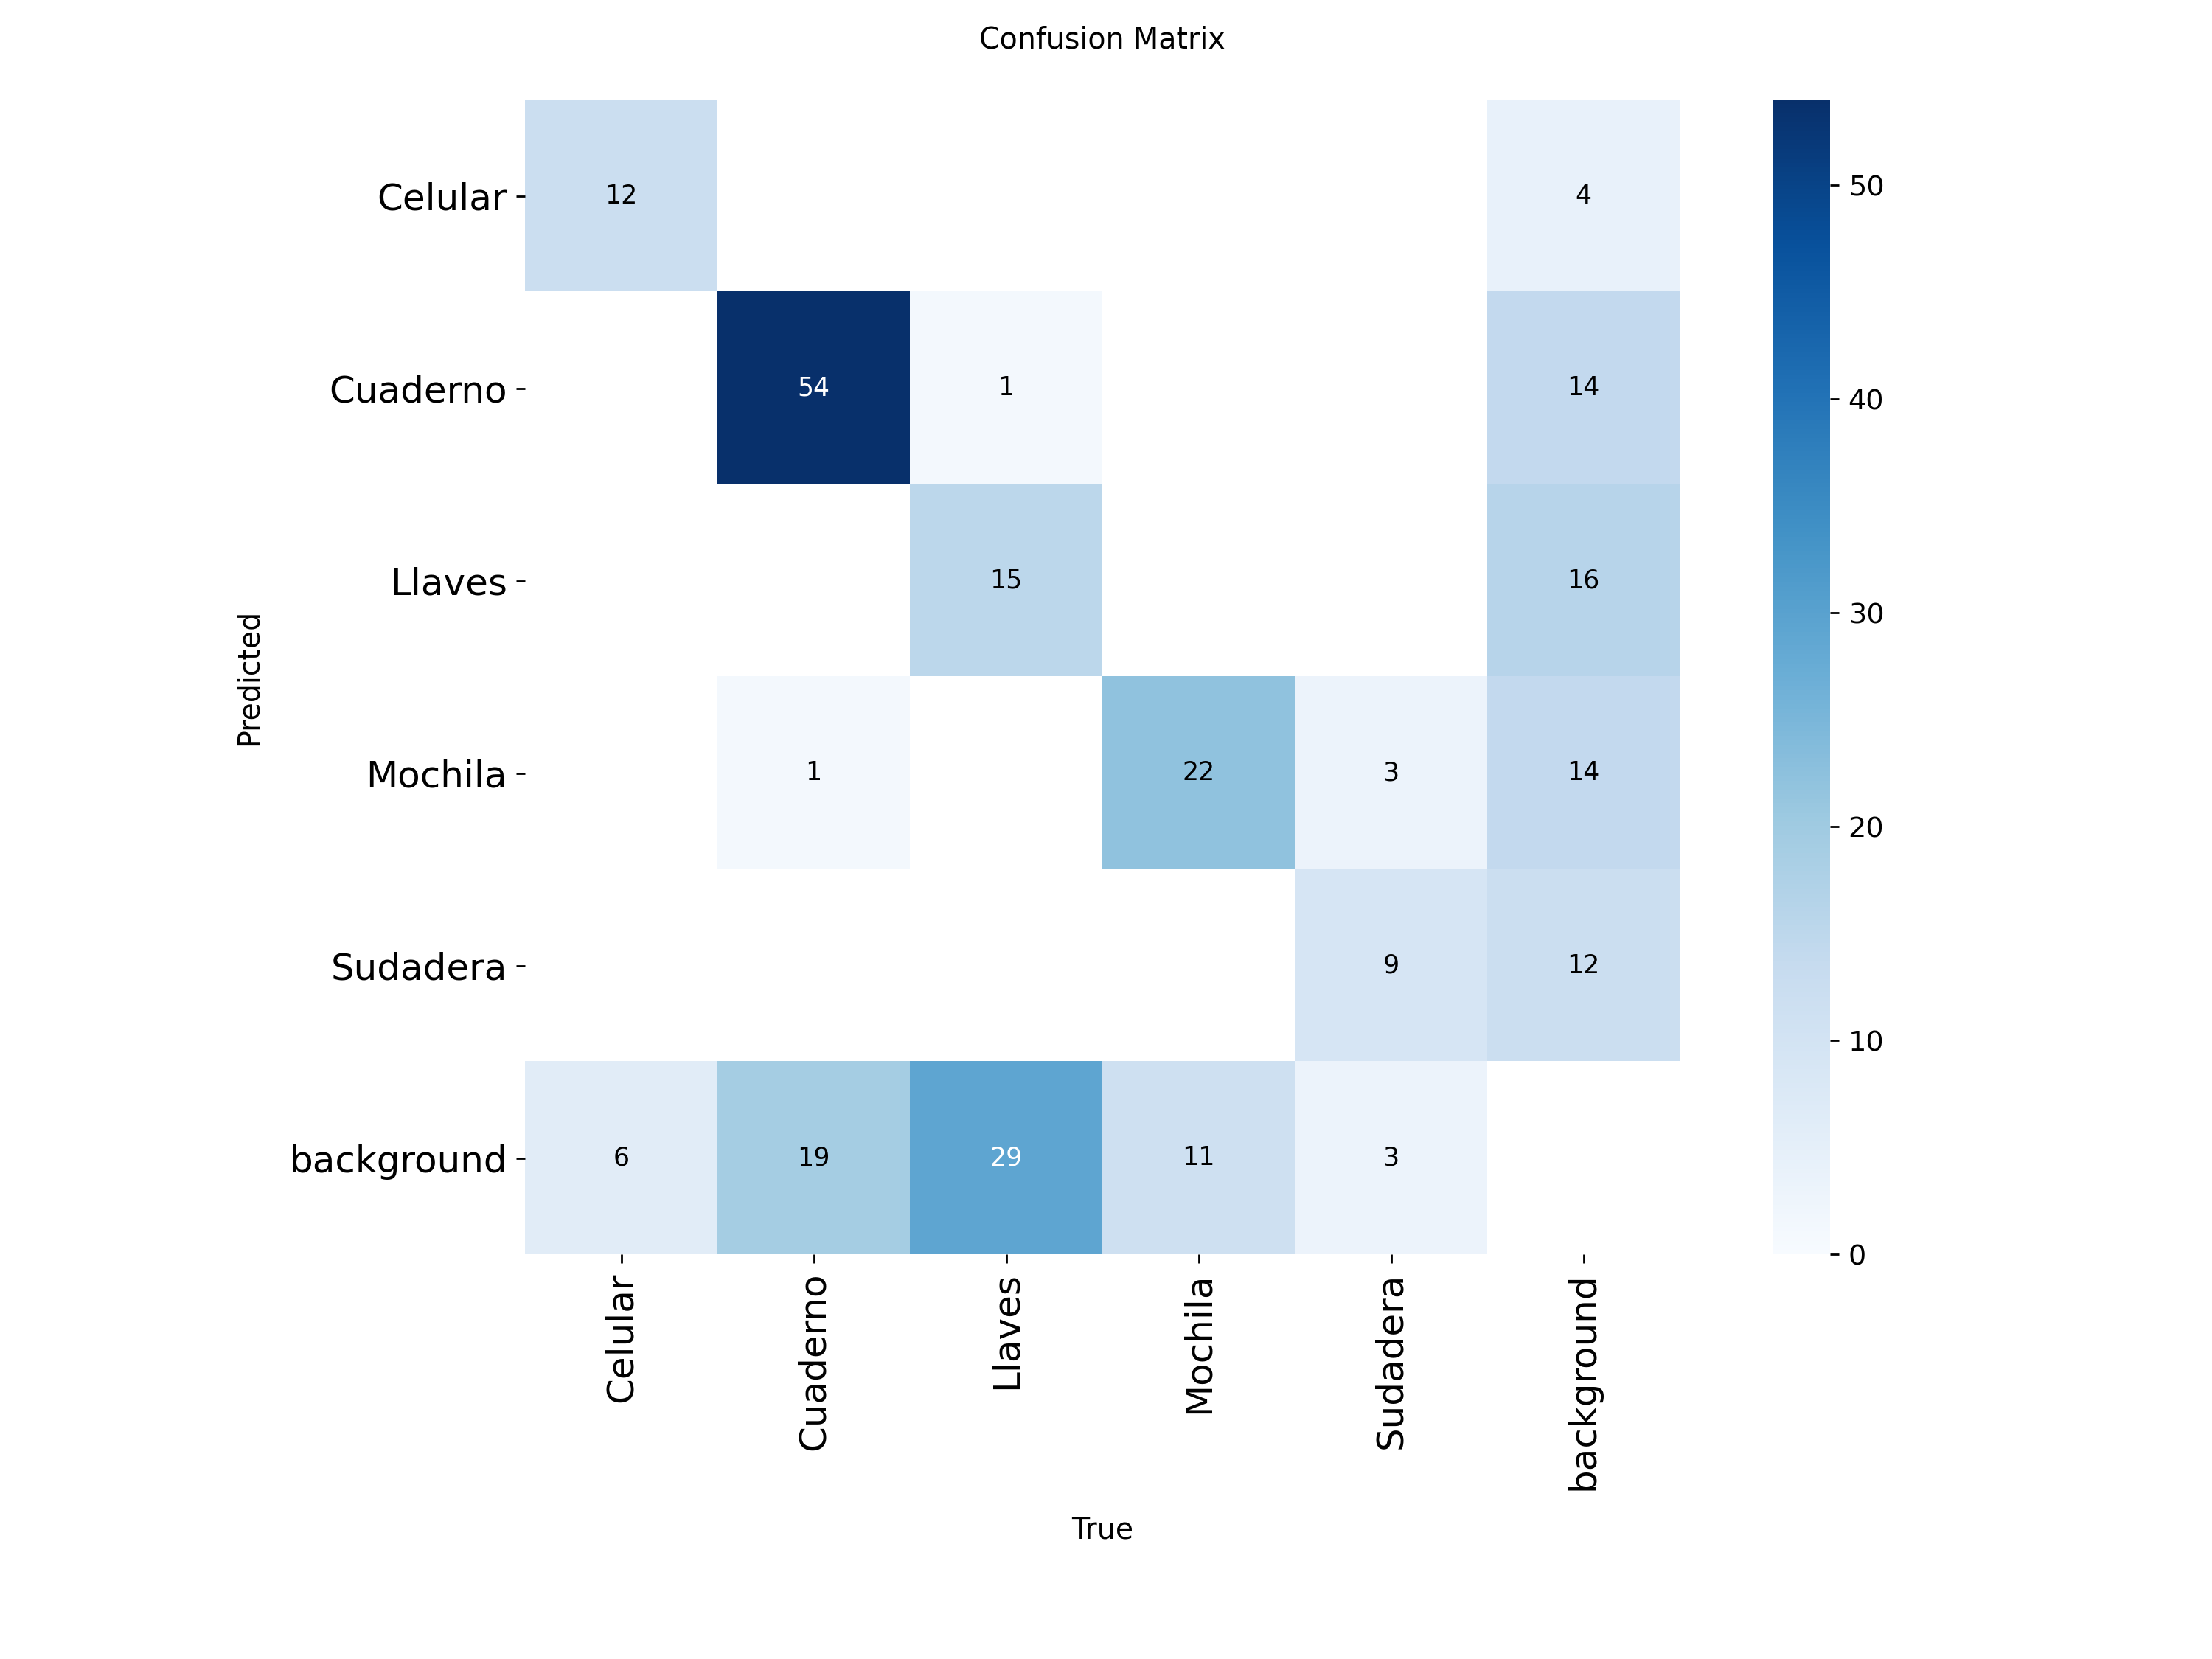


--- Mostrando confusion_matrix_normalized.png ---


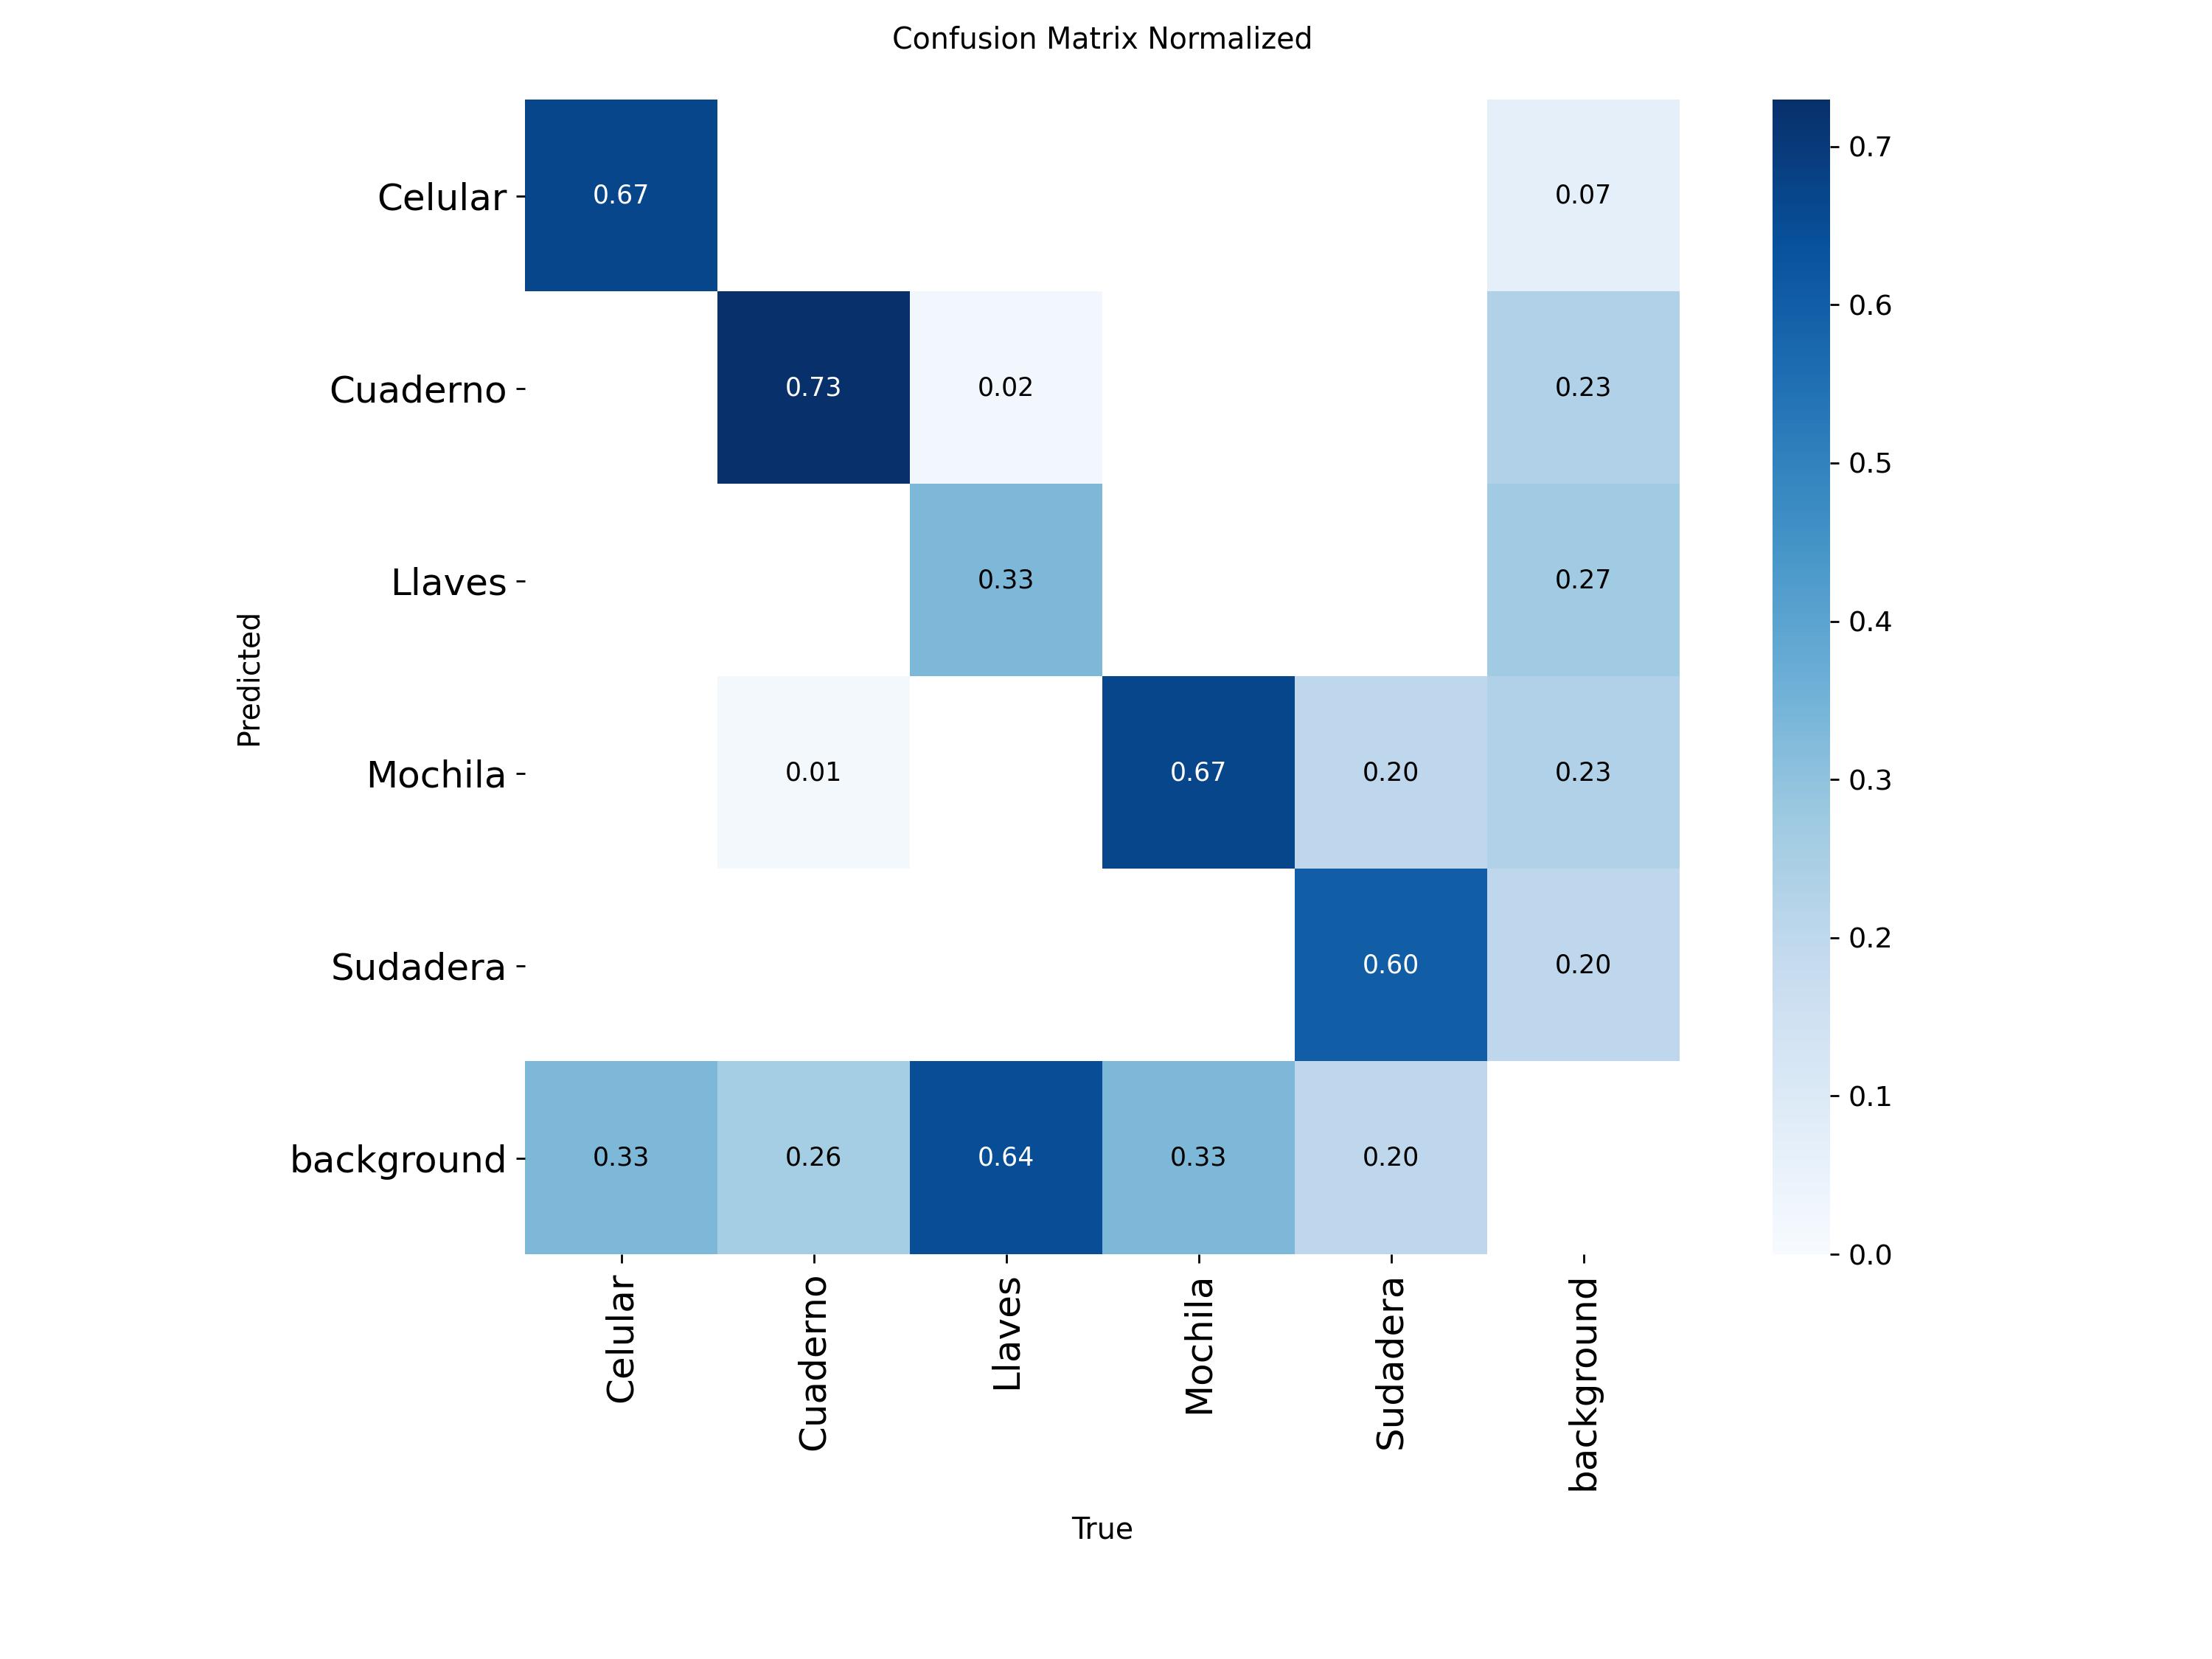


--- Mostrando labels.jpg ---


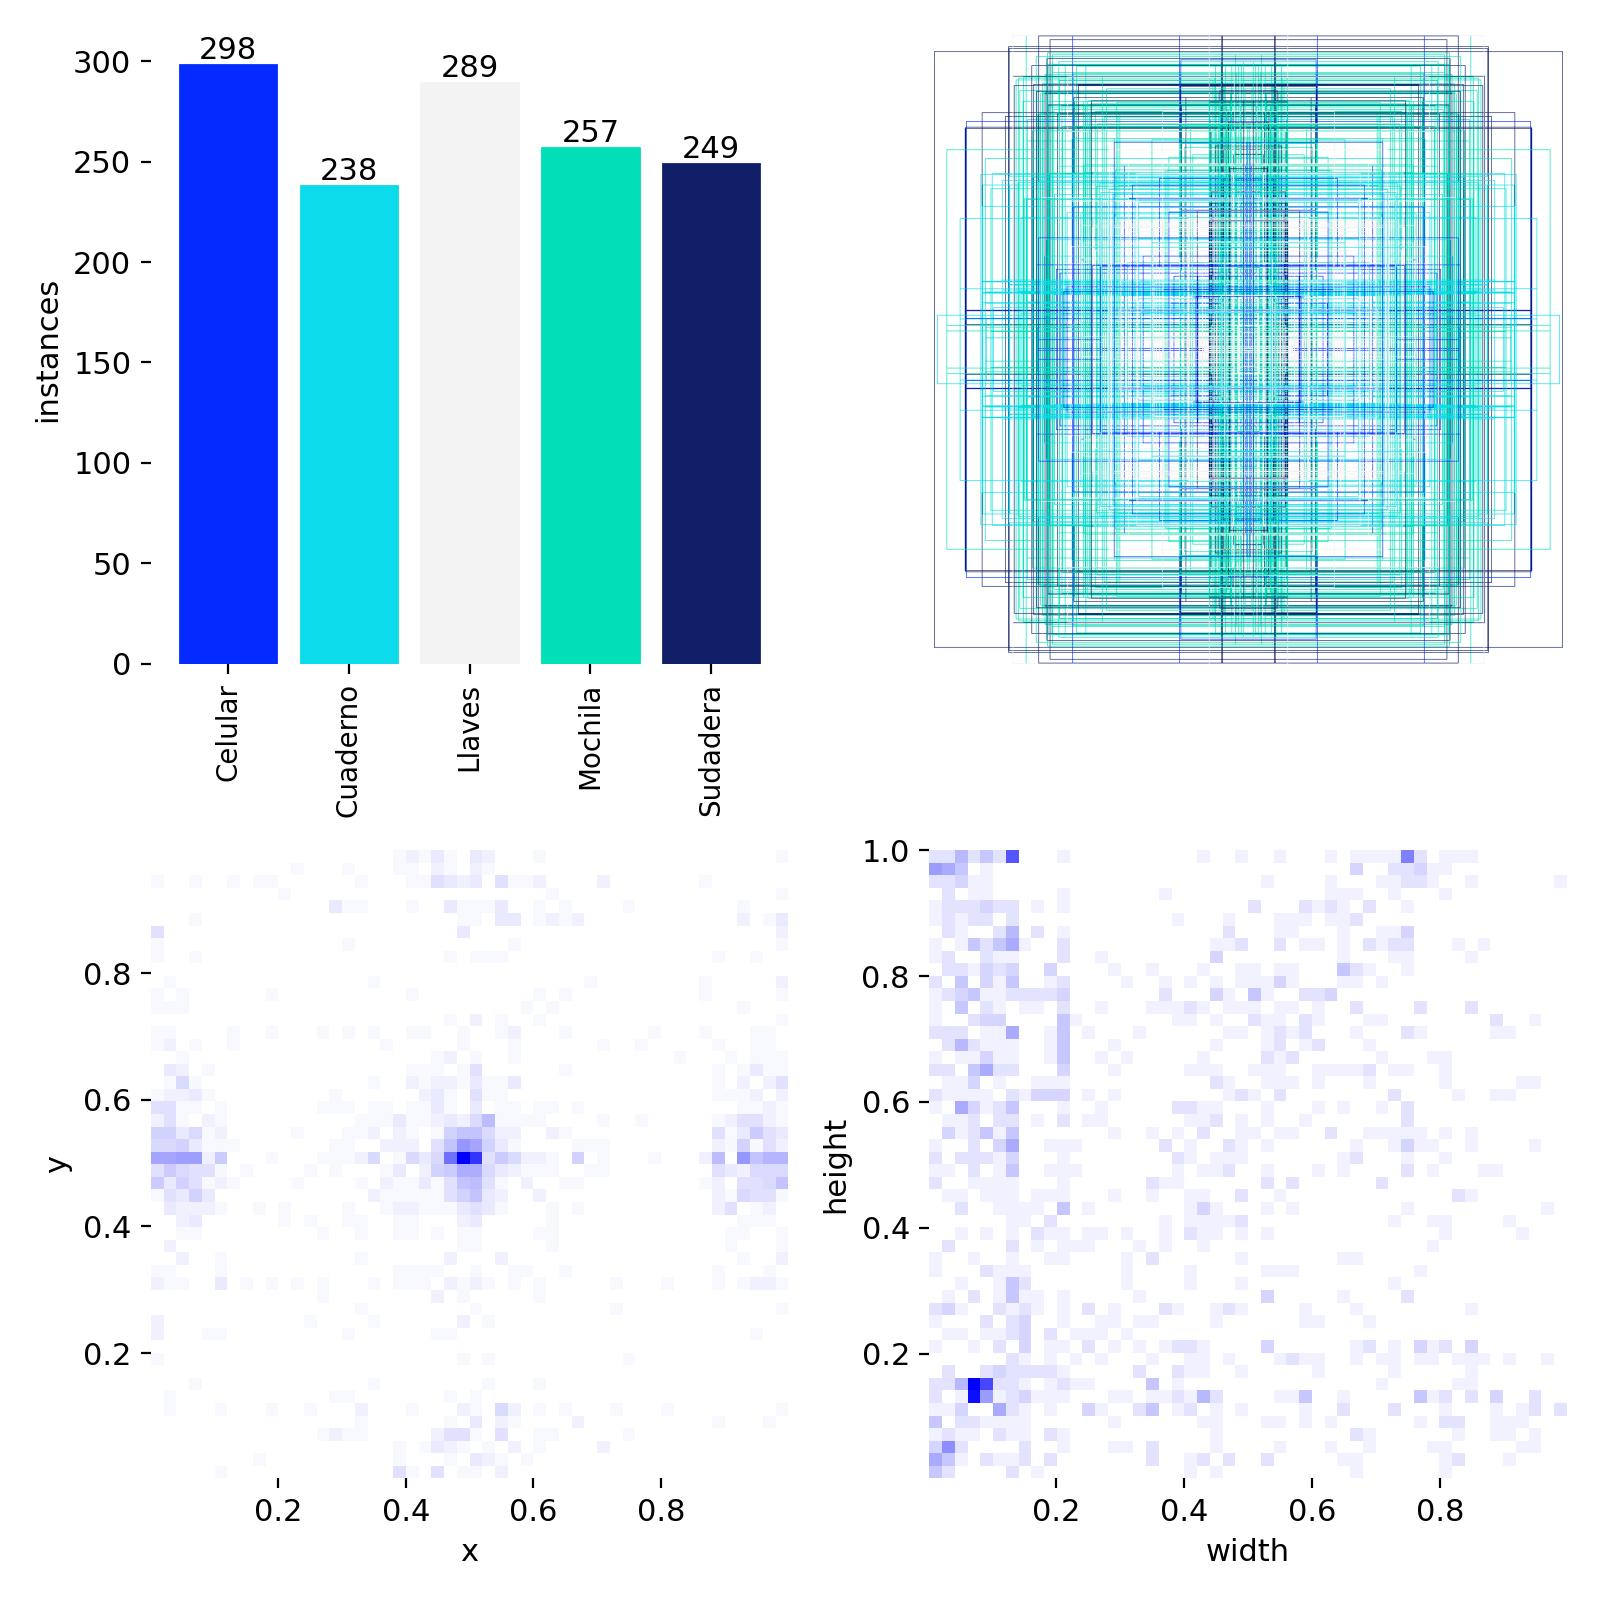

Advertencia: labels_correlogram.jpg no encontrado en /content/runs/detect/train


In [9]:
import os
from IPython.display import Image, display


train5_dir = '/content/runs/detect/train'


image_files = [
    'results.png',
    'F1_curve.png',
    'confusion_matrix.png',
    'confusion_matrix_normalized.png',
    'labels.jpg',
    'labels_correlogram.jpg'
]

print(f"Visualizando resultados del entrenamiento: {train5_dir}")
for img_file in image_files:
    img_path = os.path.join(train5_dir, img_file)
    if os.path.exists(img_path):
        print(f"\n--- Mostrando {img_file} ---")
        display(Image(filename=img_path, width=800))
    else:
        print(f"Advertencia: {img_file} no encontrado en {train5_dir}")

# **Entrenamiento del modelo YOLOv8 con el dataset que acabamos de descomprimir.**
100 epocas

In [10]:
from ultralytics import YOLO
import os

# Cargar un modelo YOLOv8 pre-entrenado
model = YOLO('yolov8n.pt')

# Definir la ruta al archivo data.yaml
data_yaml_path = os.path.join(extraction_path, 'data.yaml')

# Verificar si el archivo data.yaml existe
if not os.path.exists(data_yaml_path):
    print(f"Error: No se encontró el archivo data.yaml en {data_yaml_path}")
else:
    # Entrenar el modelo
    print(f"Entrenando el modelo con la configuración del archivo: {data_yaml_path}")
    results = model.train(data=data_yaml_path, epochs=100, imgsz=640, lr0=0.01, batch=16)

    print("¡Entrenamiento completado!")



Entrenando el modelo con la configuración del archivo: /content/imagenes/data.yaml
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/imagenes/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, 

Saving WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg to WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg
Imagen subida: WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg

image 1/1 /content/WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg: 640x480 1 Celular, 1 Llaves, 1 Mochila, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict10
Directorio de guardado de resultados: /content/runs/detect/predict10
Archivos encontrados en el directorio: ['WhatsApp Image 2025-12-09 at 8.01.06 PM.jpg']


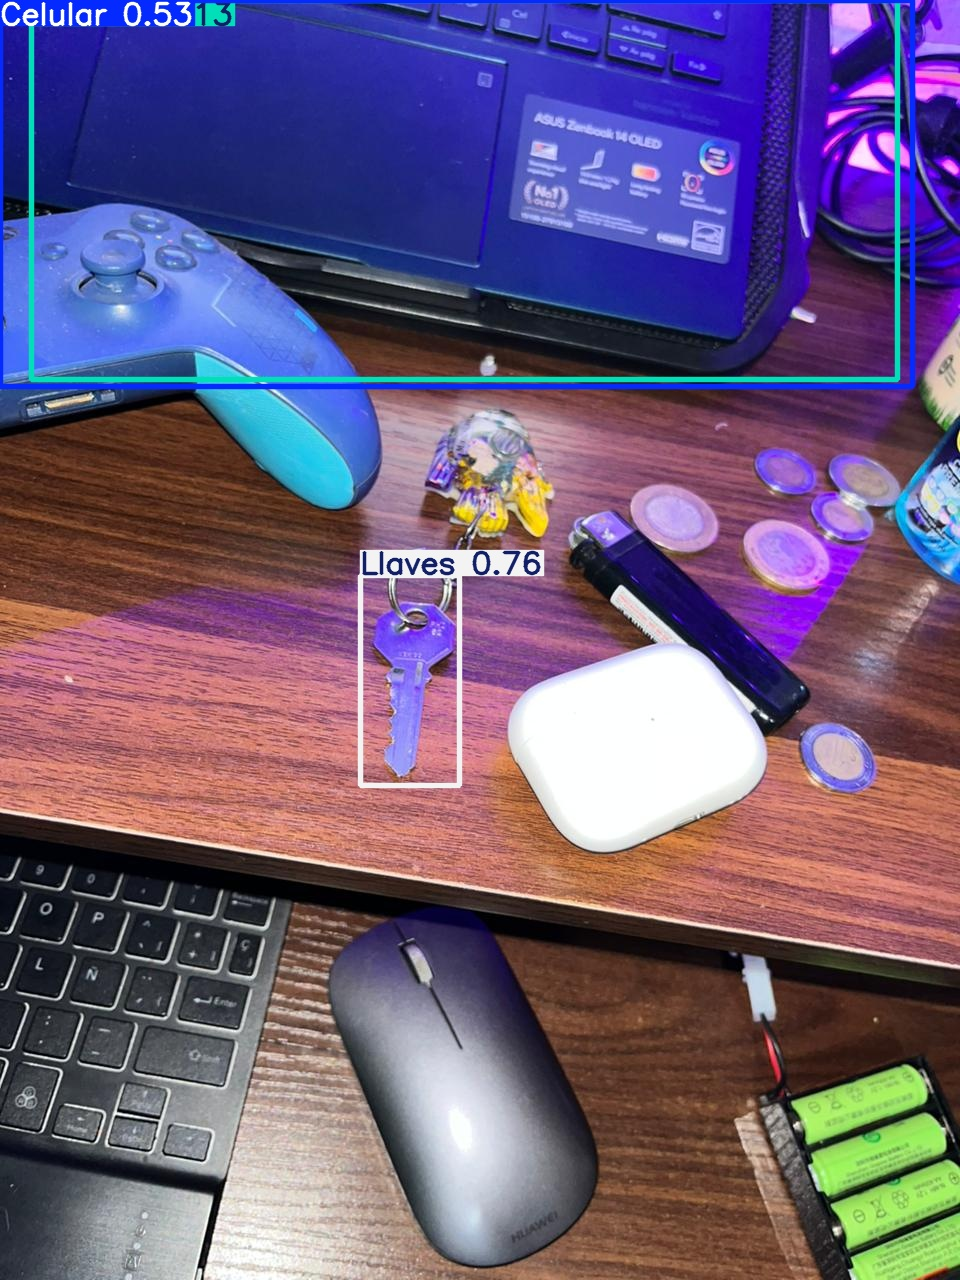

Imagen con detecciones guardada en: /content/runs/detect/predict10/WhatsApp Image 2025-12-09 at 8.01.06 PM.jpg


In [23]:
from google.colab import files
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Cargar el modelo entrenado
model_path = '/content/runs/detect/train2/weights/best.pt'
model = YOLO(model_path)

# Subir archivo
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Imagen subida: {filename}')
    # Guardar la imagen subida temporalmente
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    # Realizar inferencia en la imagen subida
    results = model.predict(source=filename, save=True, conf=0.1) # Lowered confidence threshold

    # Mostrar la imagen con las detecciones
    predicted_image_dir = results[0].save_dir # Get the directory where results are saved

    print(f"Directorio de guardado de resultados: {predicted_image_dir}")
    if os.path.exists(predicted_image_dir):
        saved_files = os.listdir(predicted_image_dir)
        print(f"Archivos encontrados en el directorio: {saved_files}")

        # Try to find the correct saved filename. Ultralytics usually saves with .jpg
        # and might sanitize the filename or add a suffix. We'll look for any common image extension.
        found_image_file = None
        for f in saved_files:
            if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
                found_image_file = f
                break

        if found_image_file:
            predicted_image_path = os.path.join(predicted_image_dir, found_image_file)
            display(Image(filename=predicted_image_path, width=600))
            print(f"Imagen con detecciones guardada en: {predicted_image_path}")
        else:
            print("No se encontró ninguna imagen con detecciones en el directorio de guardado.")
            print(f"Directorio revisado: {predicted_image_dir}")
    else:
        print("El directorio de guardado no existe, lo cual es inesperado.")

    # Eliminar el archivo temporal para limpiar
    os.remove(filename)

Visualizando resultados del entrenamiento: /content/runs/detect/train2

--- Mostrando results.png ---


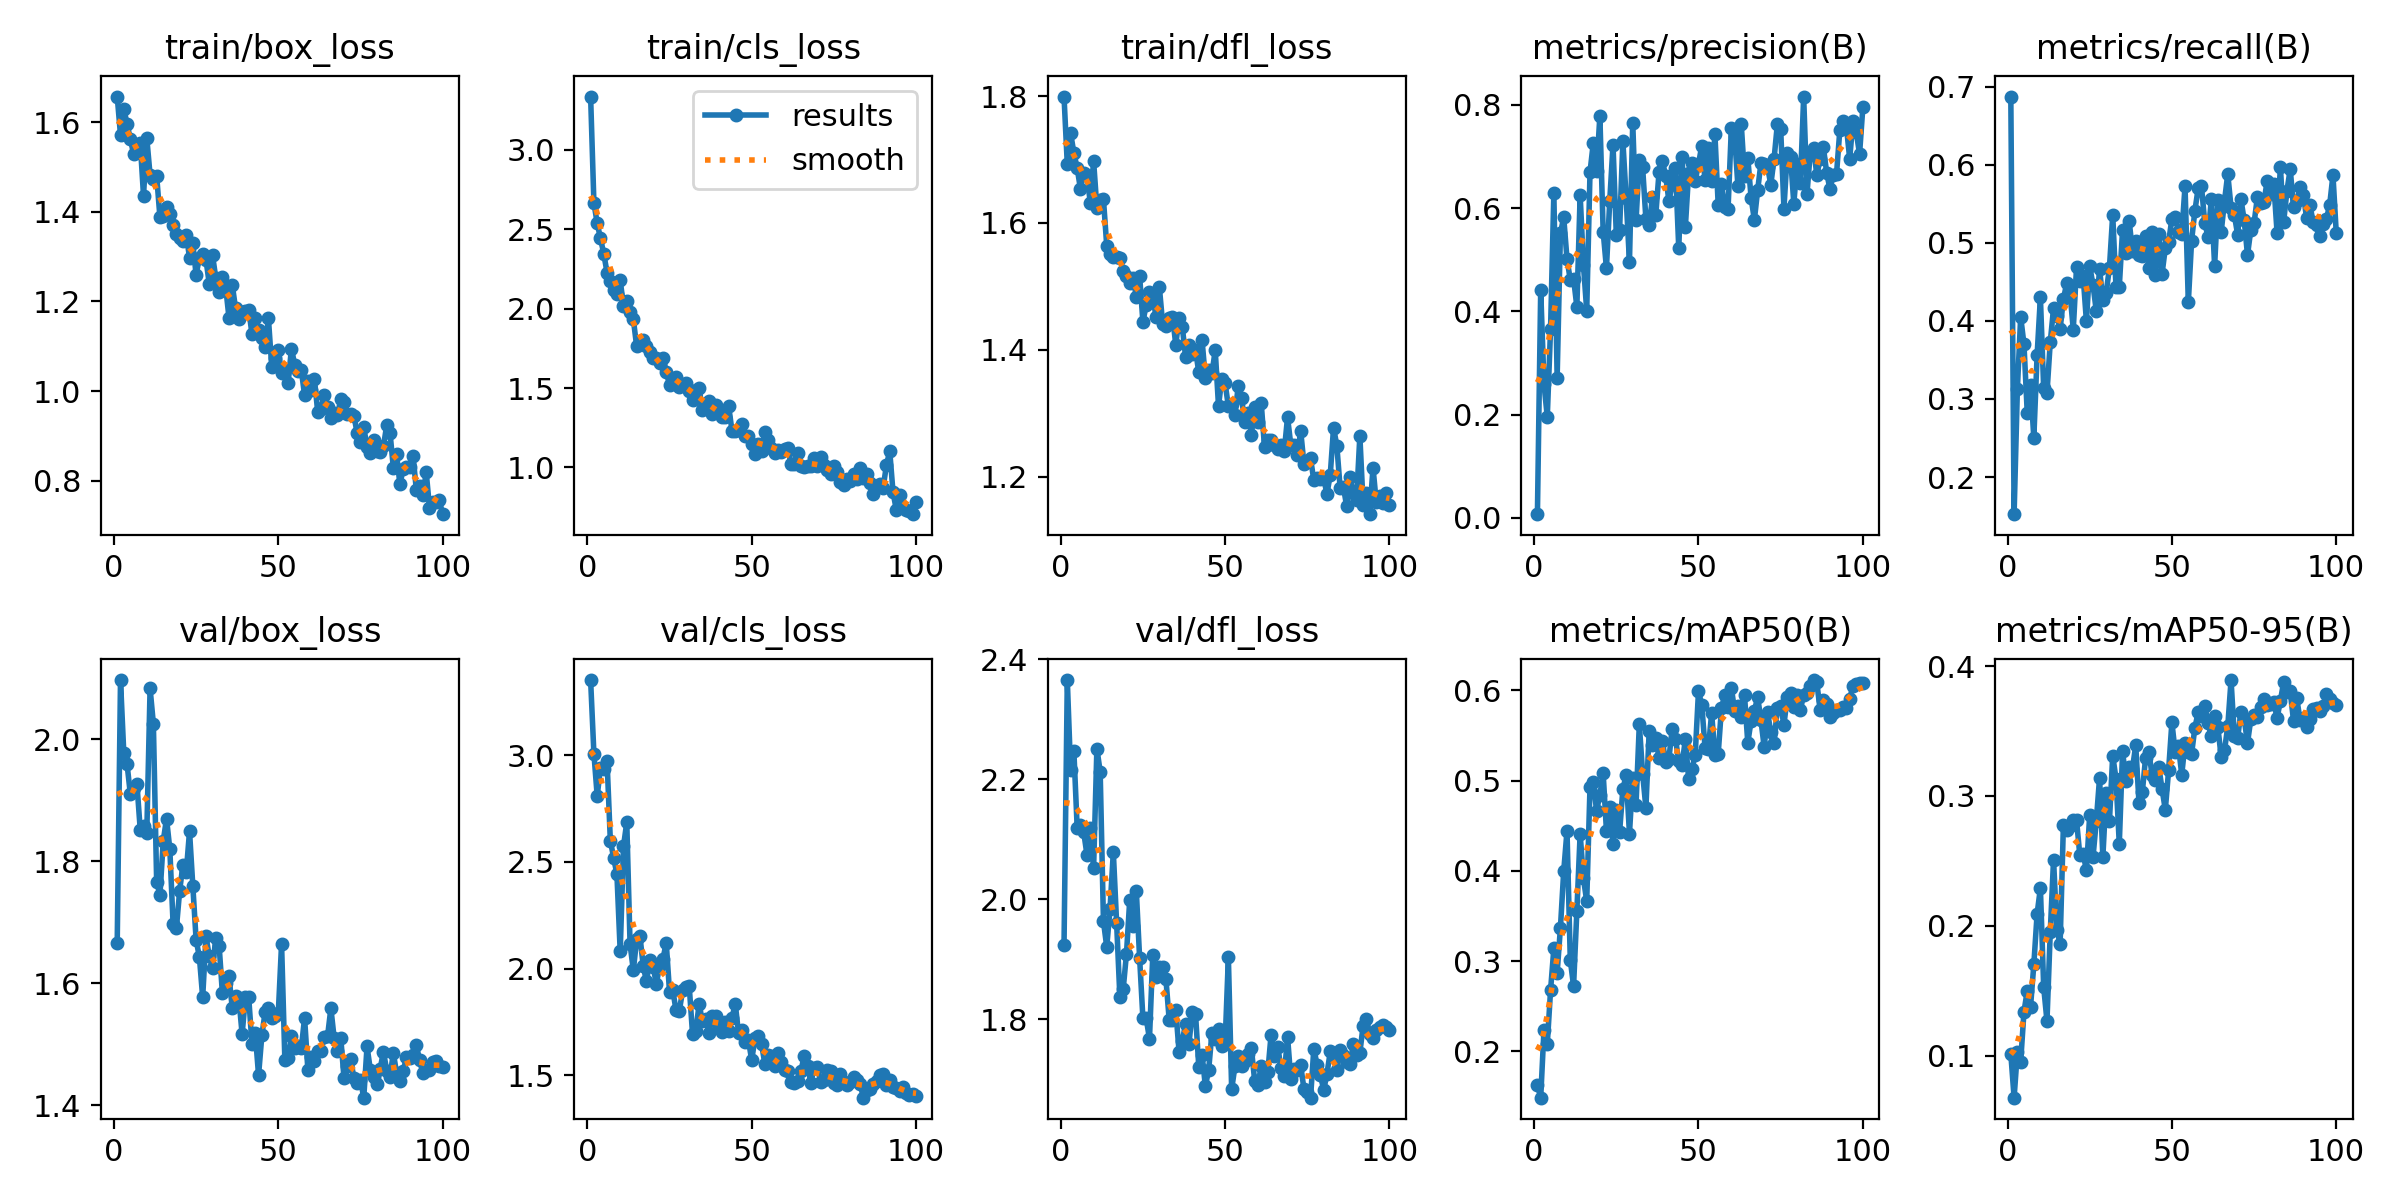

Advertencia: F1_curve.png no encontrado en /content/runs/detect/train2

--- Mostrando confusion_matrix.png ---


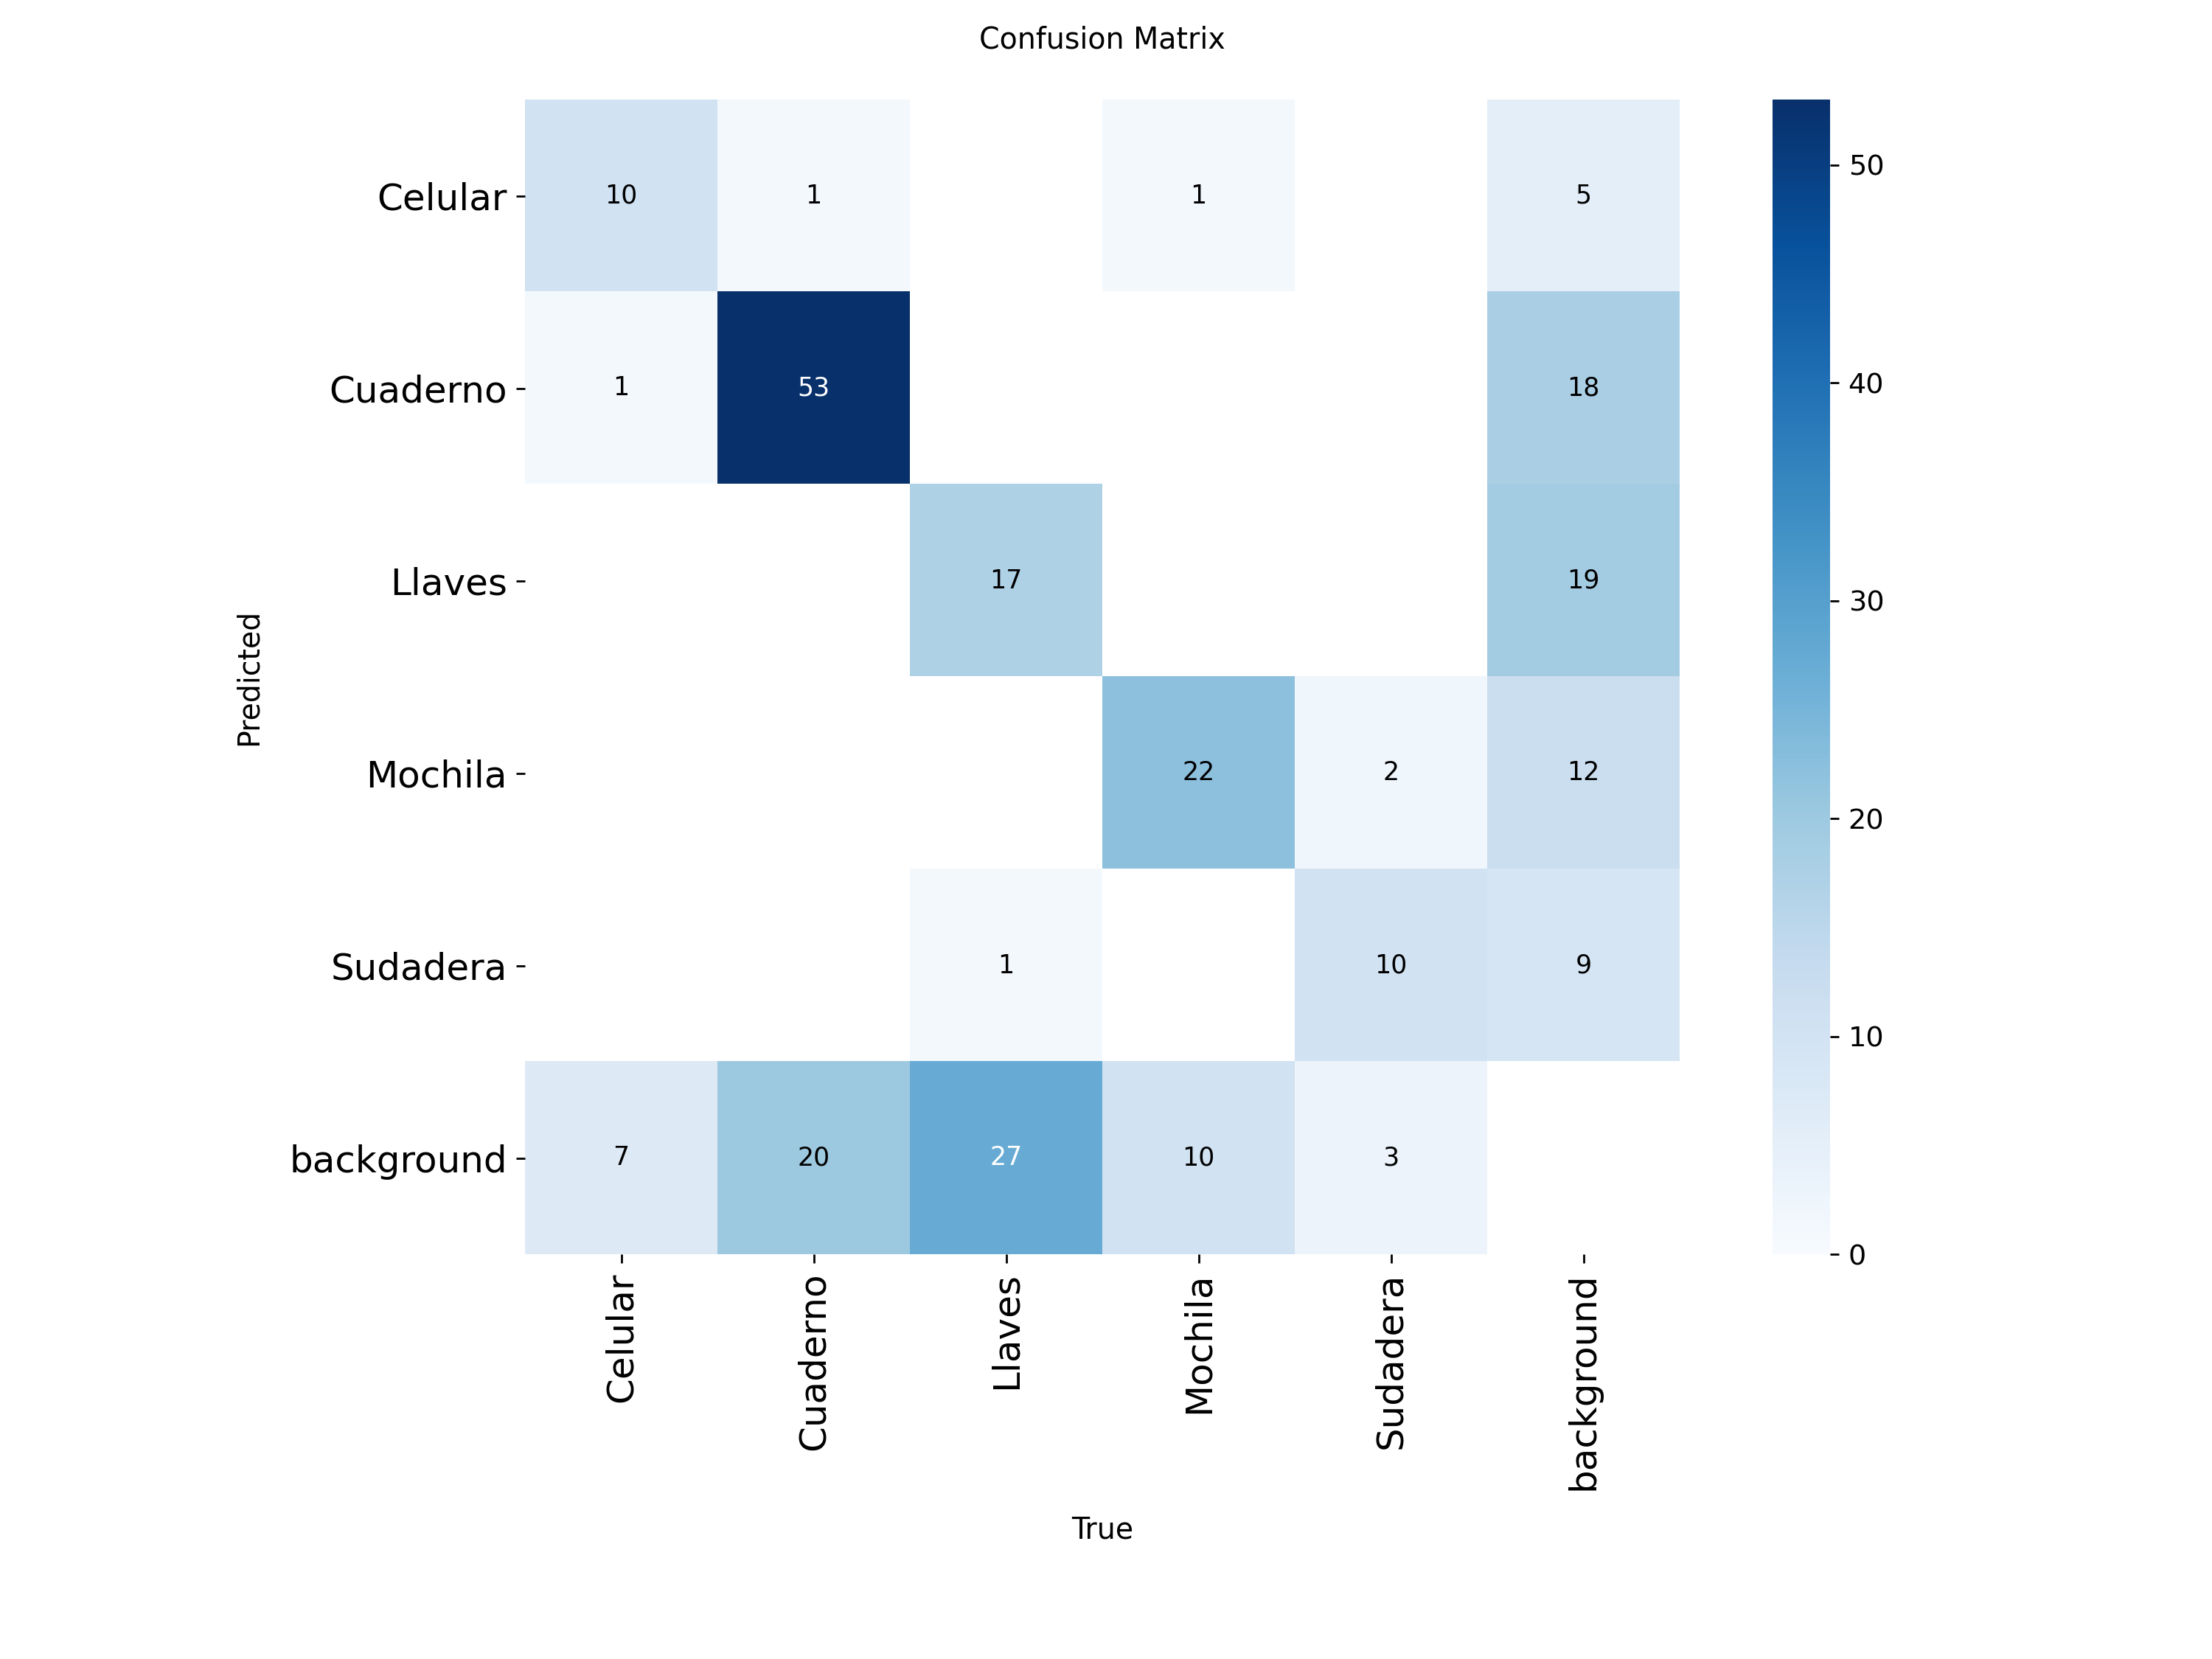


--- Mostrando confusion_matrix_normalized.png ---


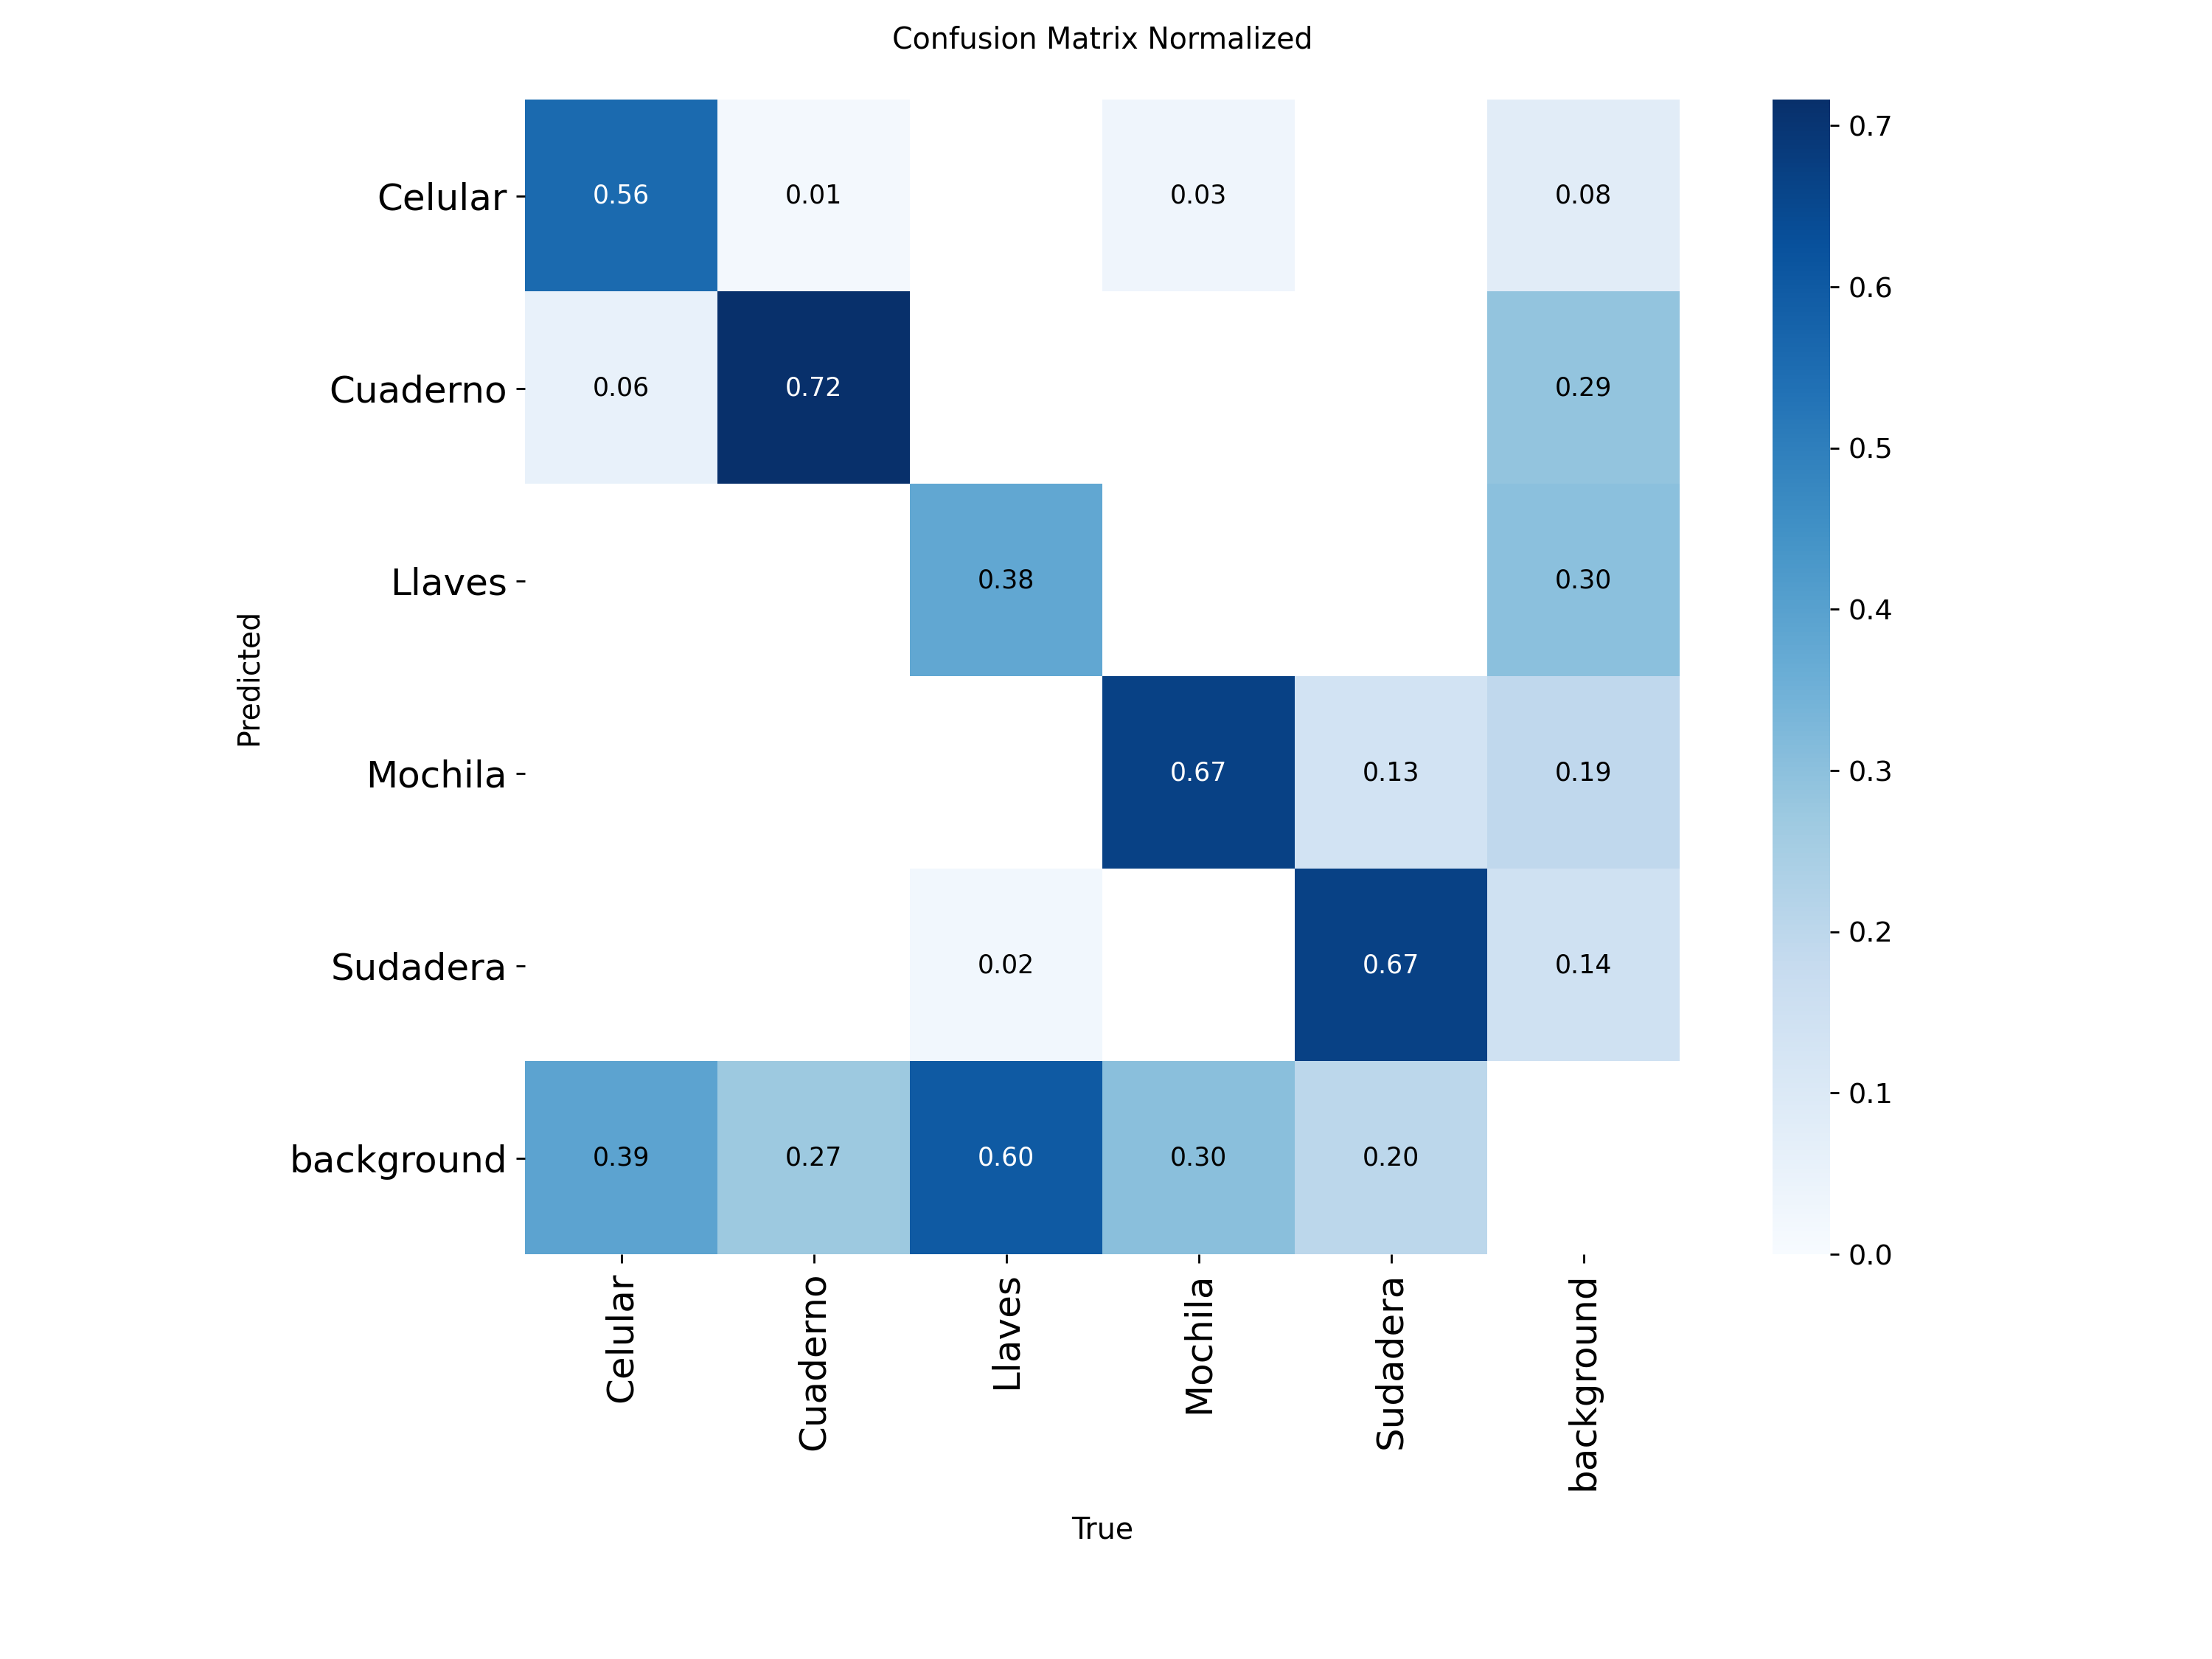


--- Mostrando labels.jpg ---


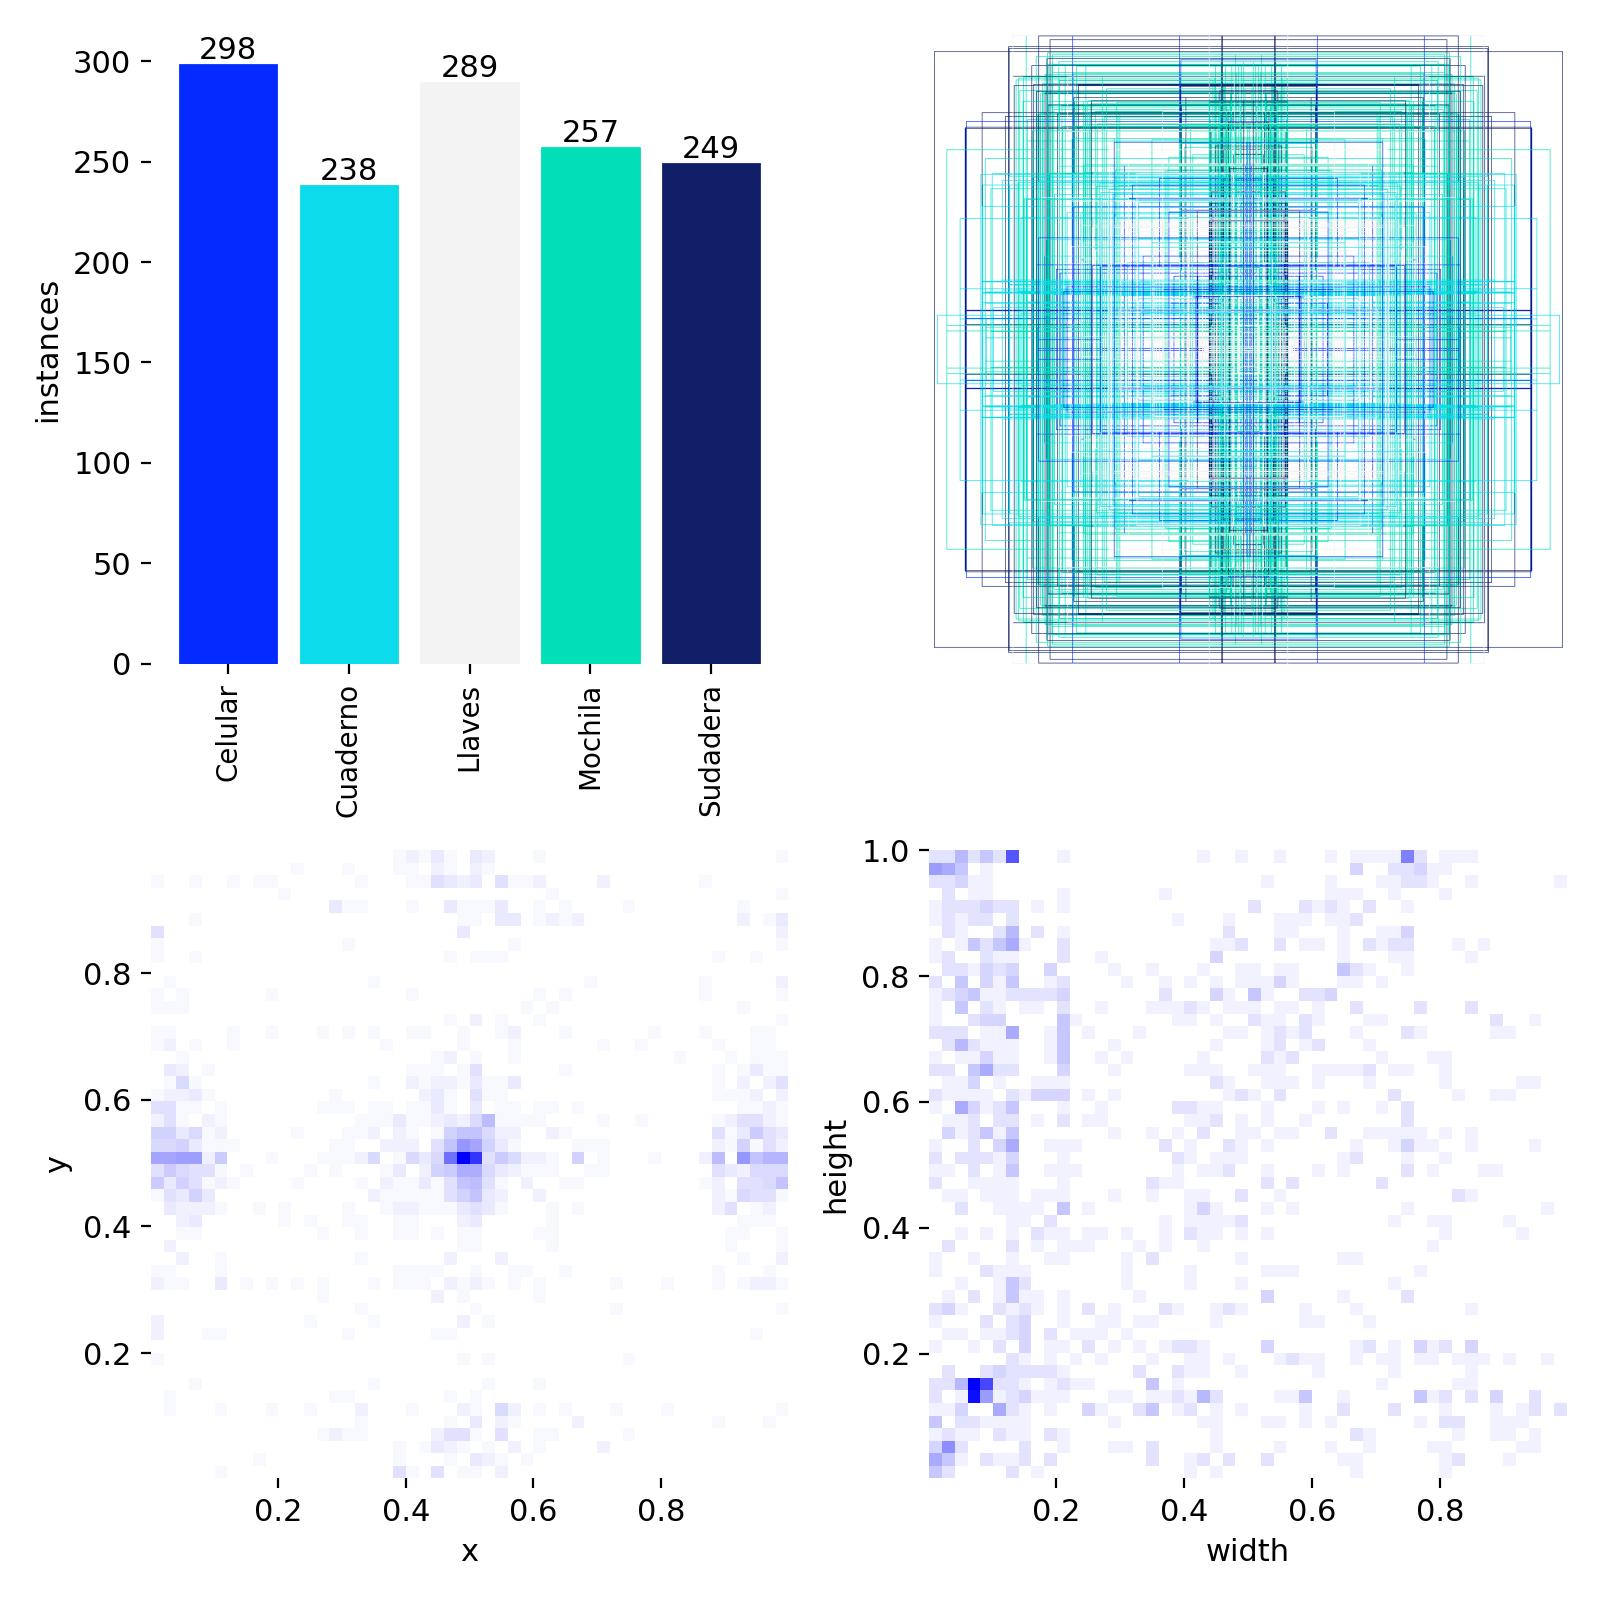

Advertencia: labels_correlogram.jpg no encontrado en /content/runs/detect/train2


In [26]:
import os
from IPython.display import Image, display


train5_dir = '/content/runs/detect/train2'


image_files = [
    'results.png',
    'F1_curve.png',
    'confusion_matrix.png',
    'confusion_matrix_normalized.png',
    'labels.jpg',
    'labels_correlogram.jpg'
]

print(f"Visualizando resultados del entrenamiento: {train5_dir}")
for img_file in image_files:
    img_path = os.path.join(train5_dir, img_file)
    if os.path.exists(img_path):
        print(f"\n--- Mostrando {img_file} ---")
        display(Image(filename=img_path, width=800))
    else:
        print(f"Advertencia: {img_file} no encontrado en {train5_dir}")

# **Entrenamiento del modelo YOLOv8 con el dataset que acabamos de descomprimir.**
150 epocas

In [8]:
from ultralytics import YOLO
import os

# Cargar un modelo YOLOv8 pre-entrenado
model = YOLO('yolov8n.pt')

# Definir la ruta al archivo data.yaml
data_yaml_path = os.path.join(extraction_path, 'data.yaml')

# Verificar si el archivo data.yaml existe
if not os.path.exists(data_yaml_path):
    print(f"Error: No se encontró el archivo data.yaml en {data_yaml_path}")
else:
    # Entrenar el modelo
    print(f"Entrenando el modelo con la configuración del archivo: {data_yaml_path}")
    results = model.train(data=data_yaml_path, epochs=150, imgsz=640, lr0=0.005, batch=32)

    print("¡Entrenamiento completado!")



Entrenando el modelo con la configuración del archivo: /content/imagenes/data.yaml
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/imagenes/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False,

Saving WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg to WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg
Imagen subida: WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg

image 1/1 /content/WhatsApp Image 2025-12-09 at 8.01.06 PM.jpeg: 640x480 1 Llaves, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict11
Directorio de guardado de resultados: /content/runs/detect/predict11
Archivos encontrados en el directorio: ['WhatsApp Image 2025-12-09 at 8.01.06 PM.jpg']


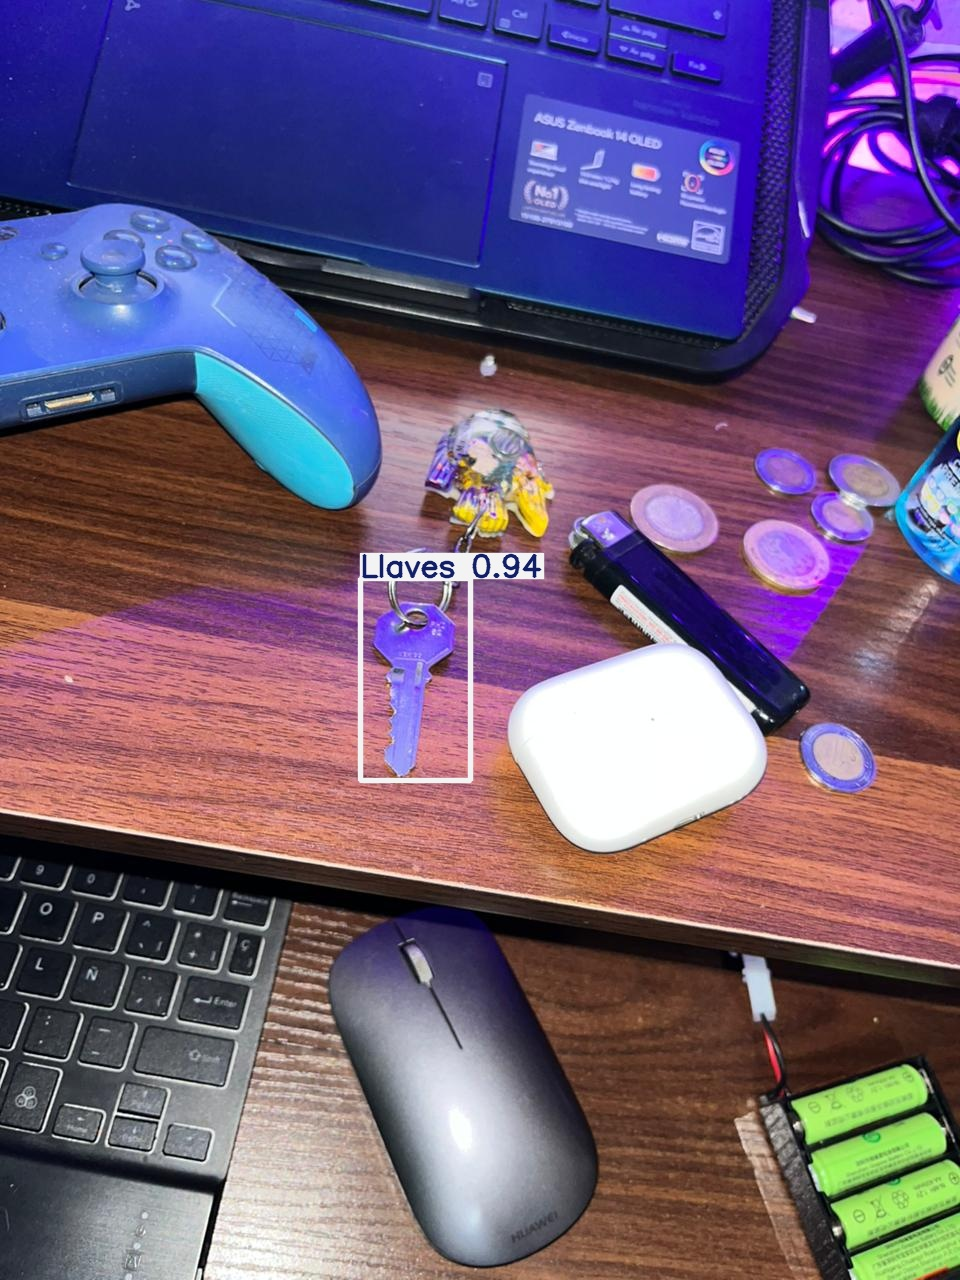

Imagen con detecciones guardada en: /content/runs/detect/predict11/WhatsApp Image 2025-12-09 at 8.01.06 PM.jpg


In [24]:
from google.colab import files
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Cargar el modelo entrenado
model_path = '/content/runs/detect/train3/weights/best.pt'
model = YOLO(model_path)

# Subir archivo
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Imagen subida: {filename}')
    # Guardar la imagen subida temporalmente
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    # Realizar inferencia en la imagen subida
    results = model.predict(source=filename, save=True, conf=0.1) # Lowered confidence threshold

    # Mostrar la imagen con las detecciones
    predicted_image_dir = results[0].save_dir # Get the directory where results are saved

    print(f"Directorio de guardado de resultados: {predicted_image_dir}")
    if os.path.exists(predicted_image_dir):
        saved_files = os.listdir(predicted_image_dir)
        print(f"Archivos encontrados en el directorio: {saved_files}")

        # Try to find the correct saved filename. Ultralytics usually saves with .jpg
        # and might sanitize the filename or add a suffix. We'll look for any common image extension.
        found_image_file = None
        for f in saved_files:
            if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
                found_image_file = f
                break

        if found_image_file:
            predicted_image_path = os.path.join(predicted_image_dir, found_image_file)
            display(Image(filename=predicted_image_path, width=600))
            print(f"Imagen con detecciones guardada en: {predicted_image_path}")
        else:
            print("No se encontró ninguna imagen con detecciones en el directorio de guardado.")
            print(f"Directorio revisado: {predicted_image_dir}")
    else:
        print("El directorio de guardado no existe, lo cual es inesperado.")

    # Eliminar el archivo temporal para limpiar
    os.remove(filename)

Visualizando resultados del entrenamiento: /content/runs/detect/train3

--- Mostrando results.png ---


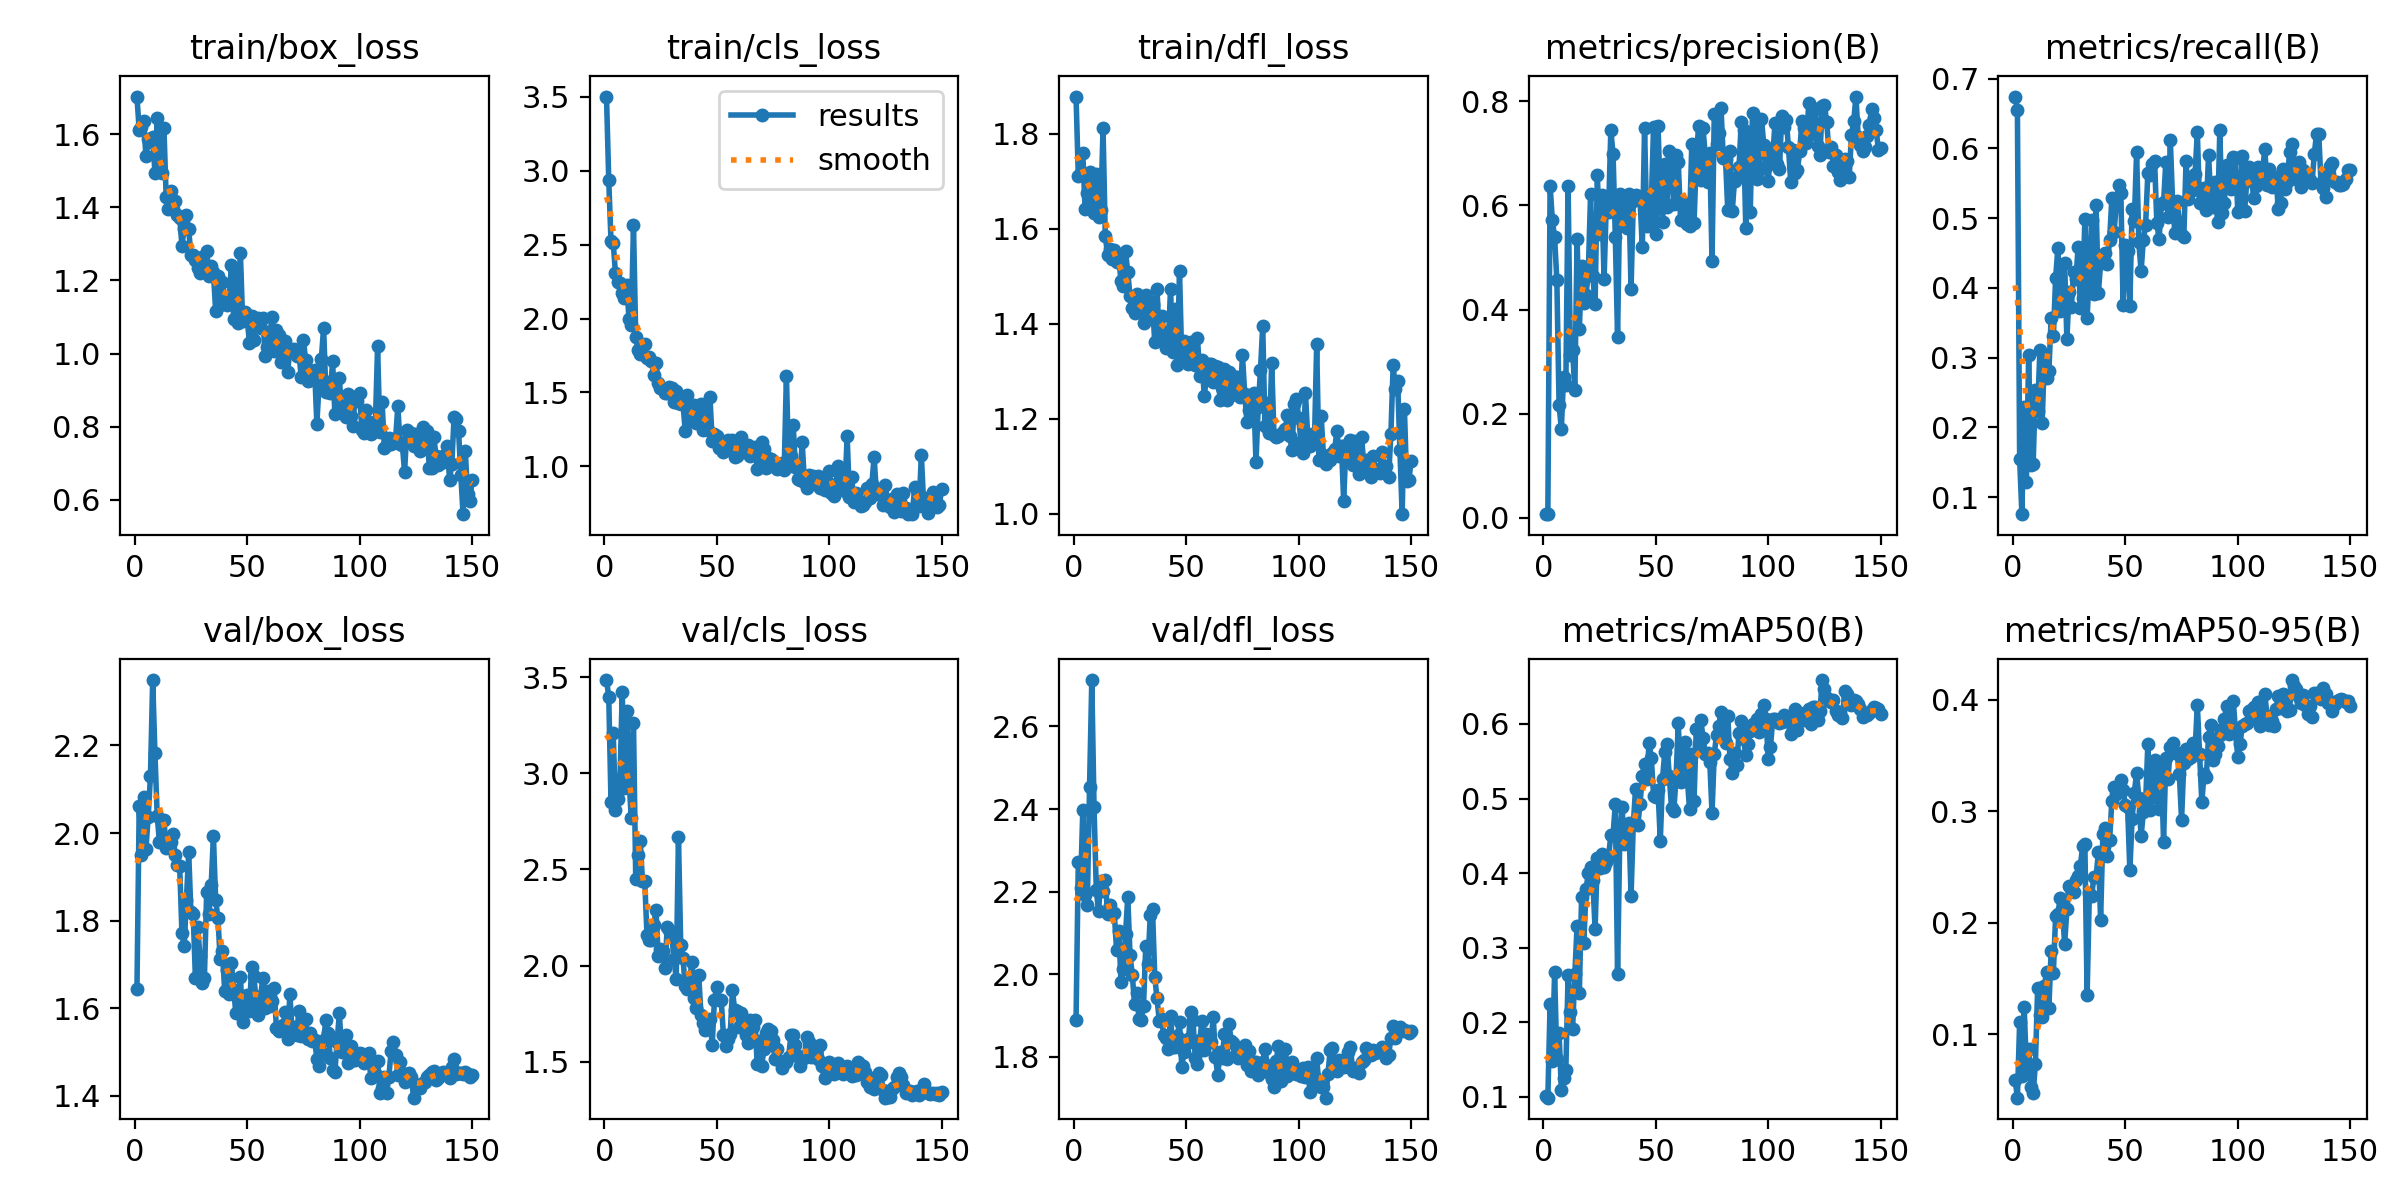

Advertencia: F1_curve.png no encontrado en /content/runs/detect/train3

--- Mostrando confusion_matrix.png ---


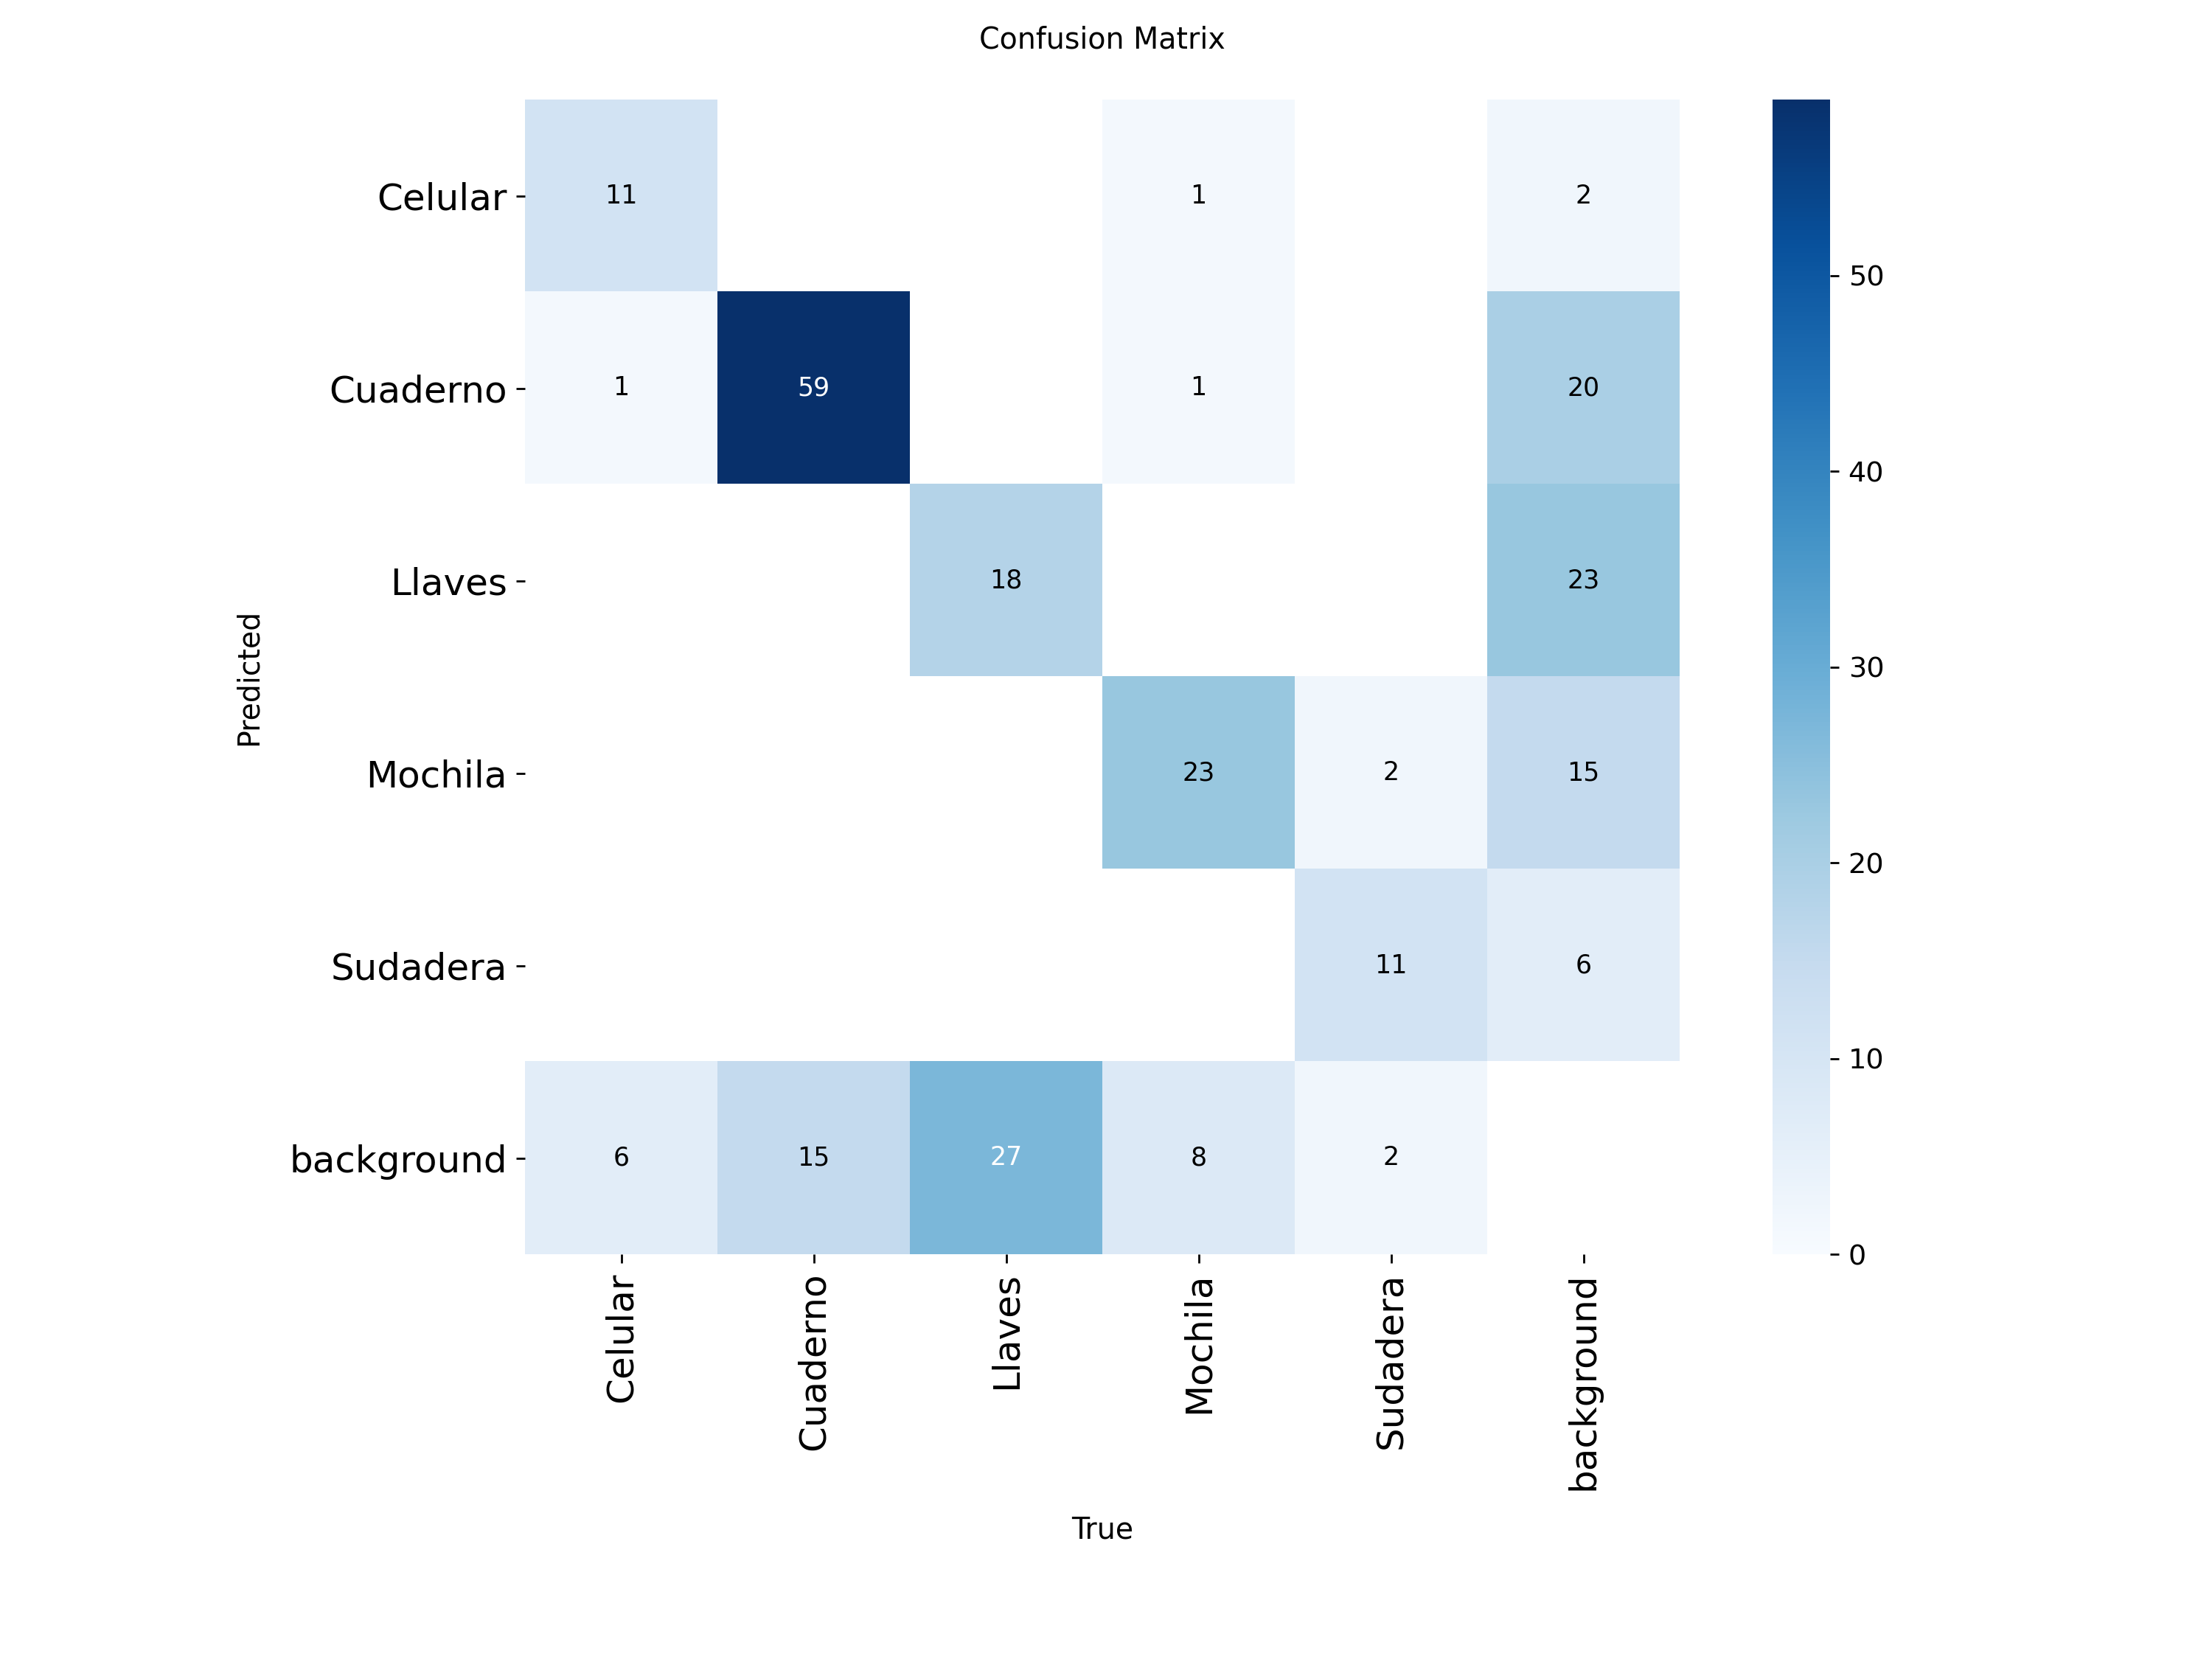


--- Mostrando confusion_matrix_normalized.png ---


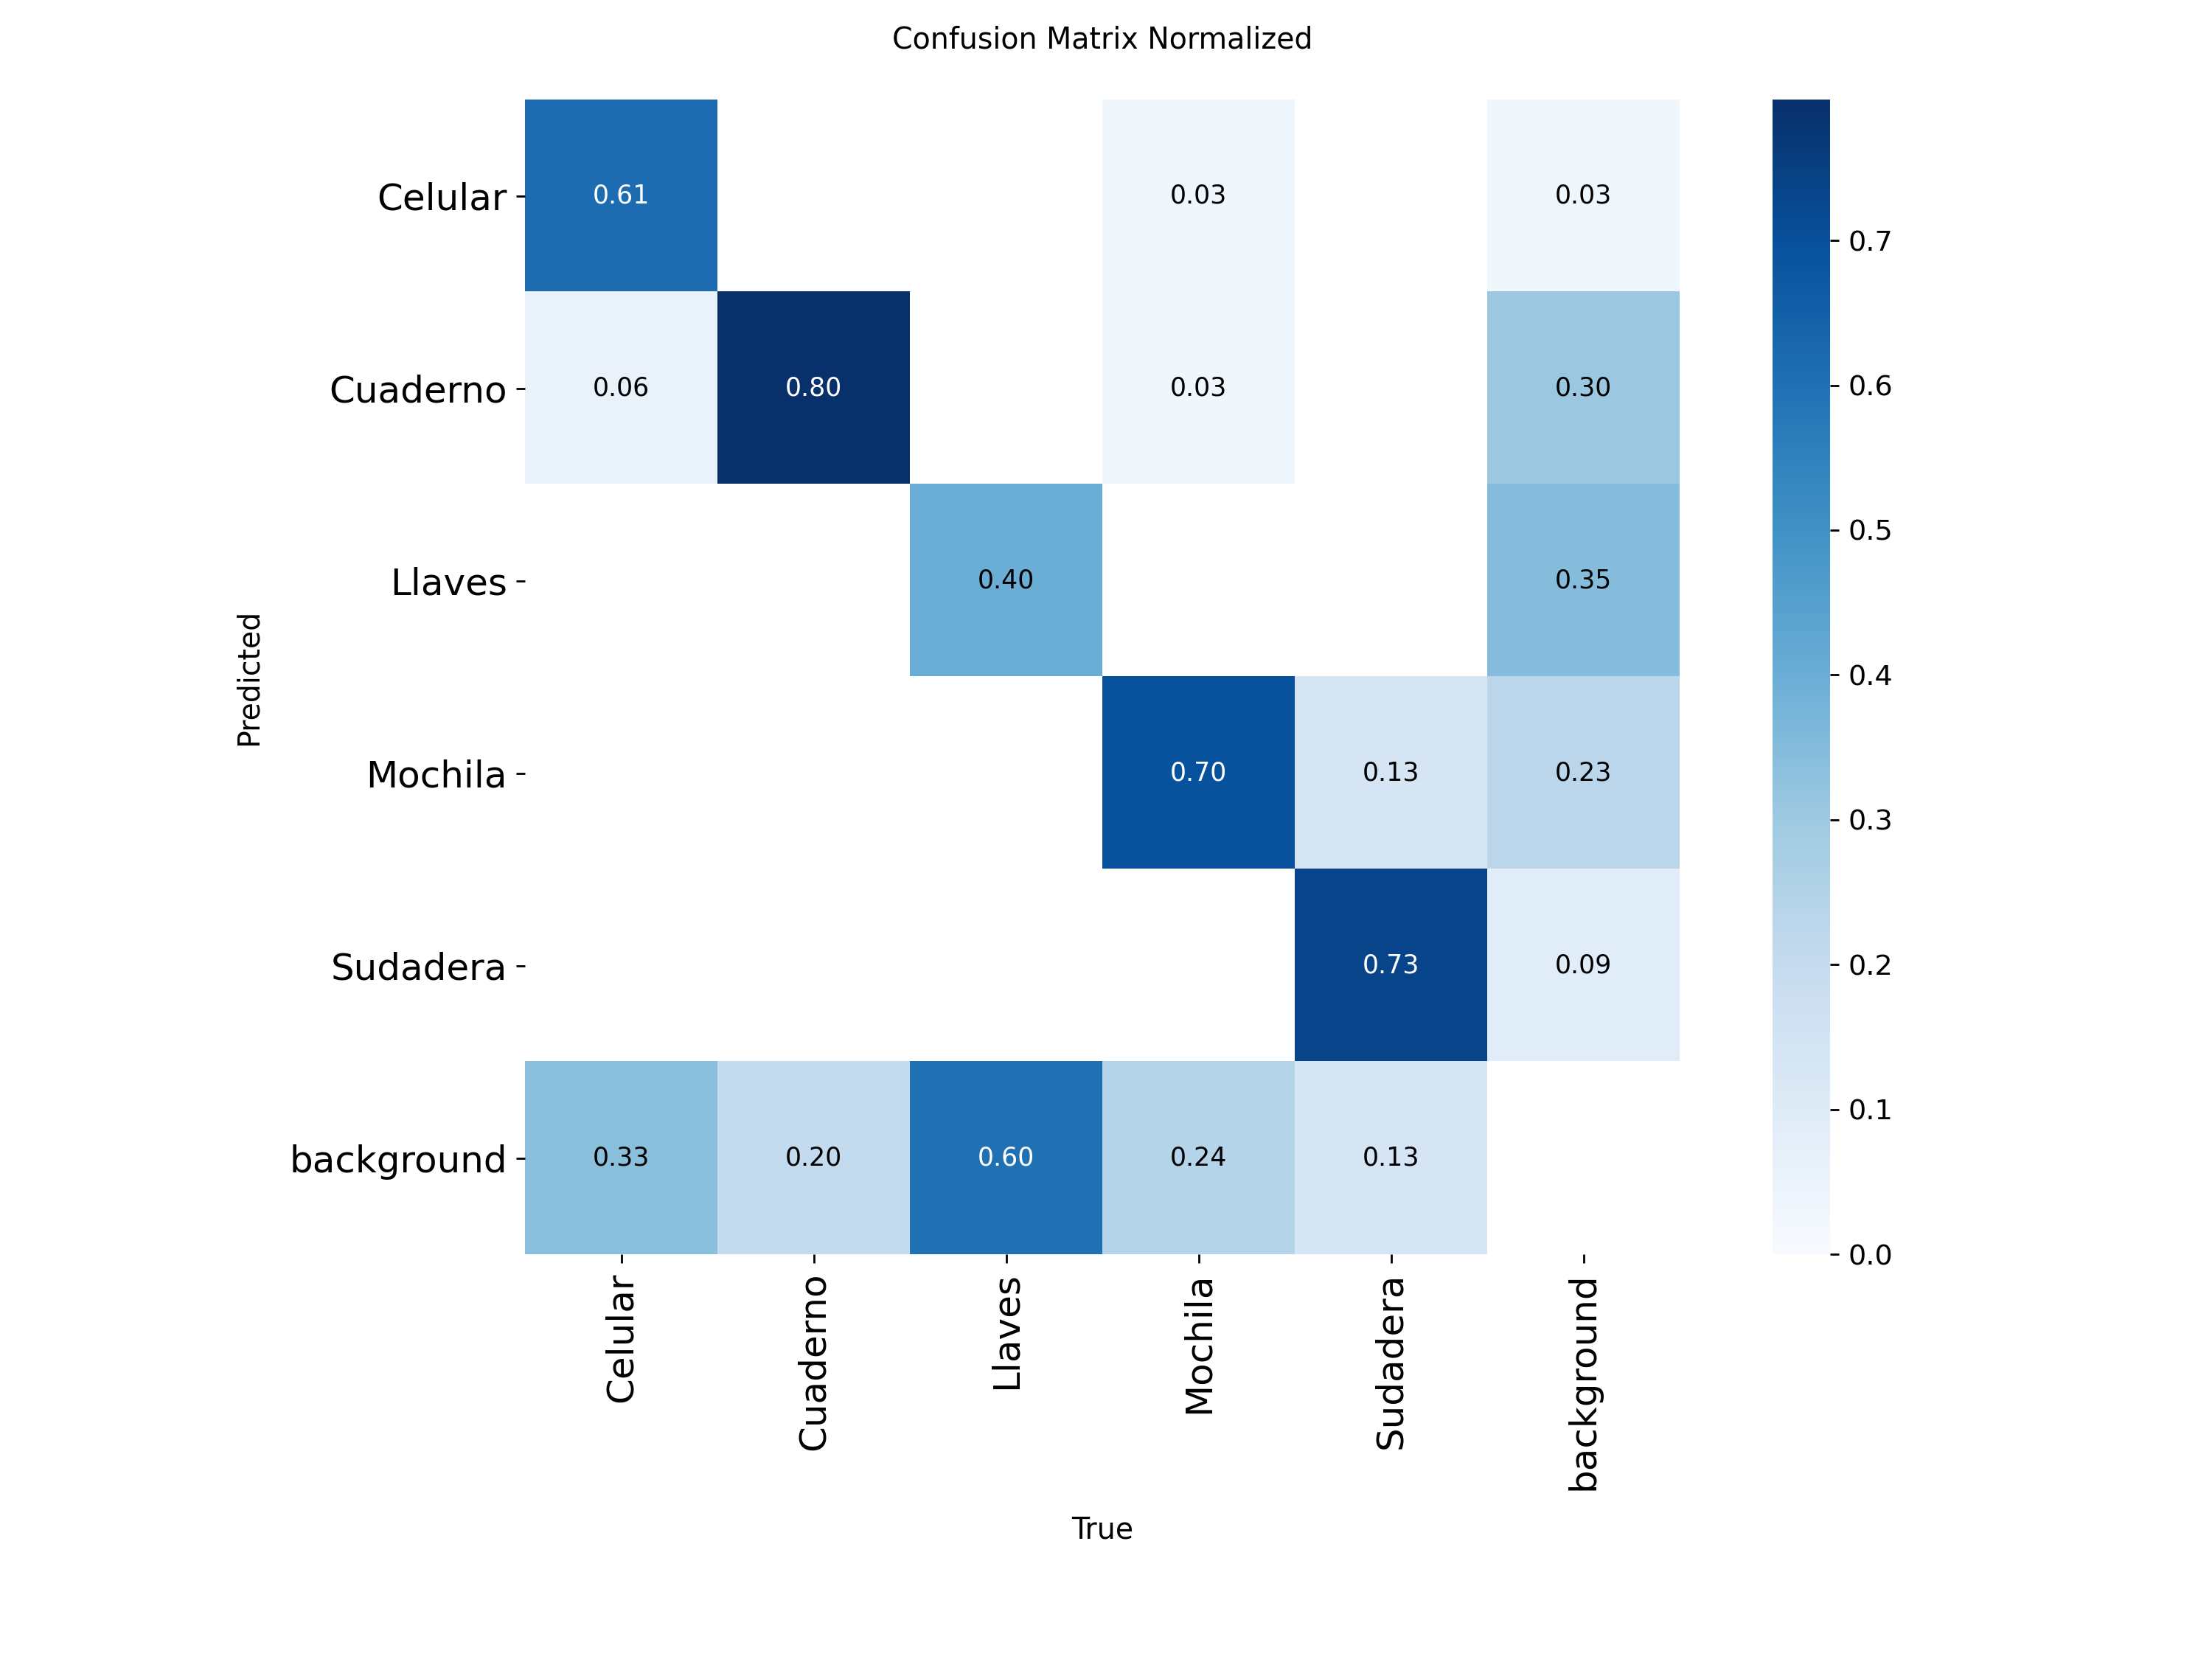


--- Mostrando labels.jpg ---


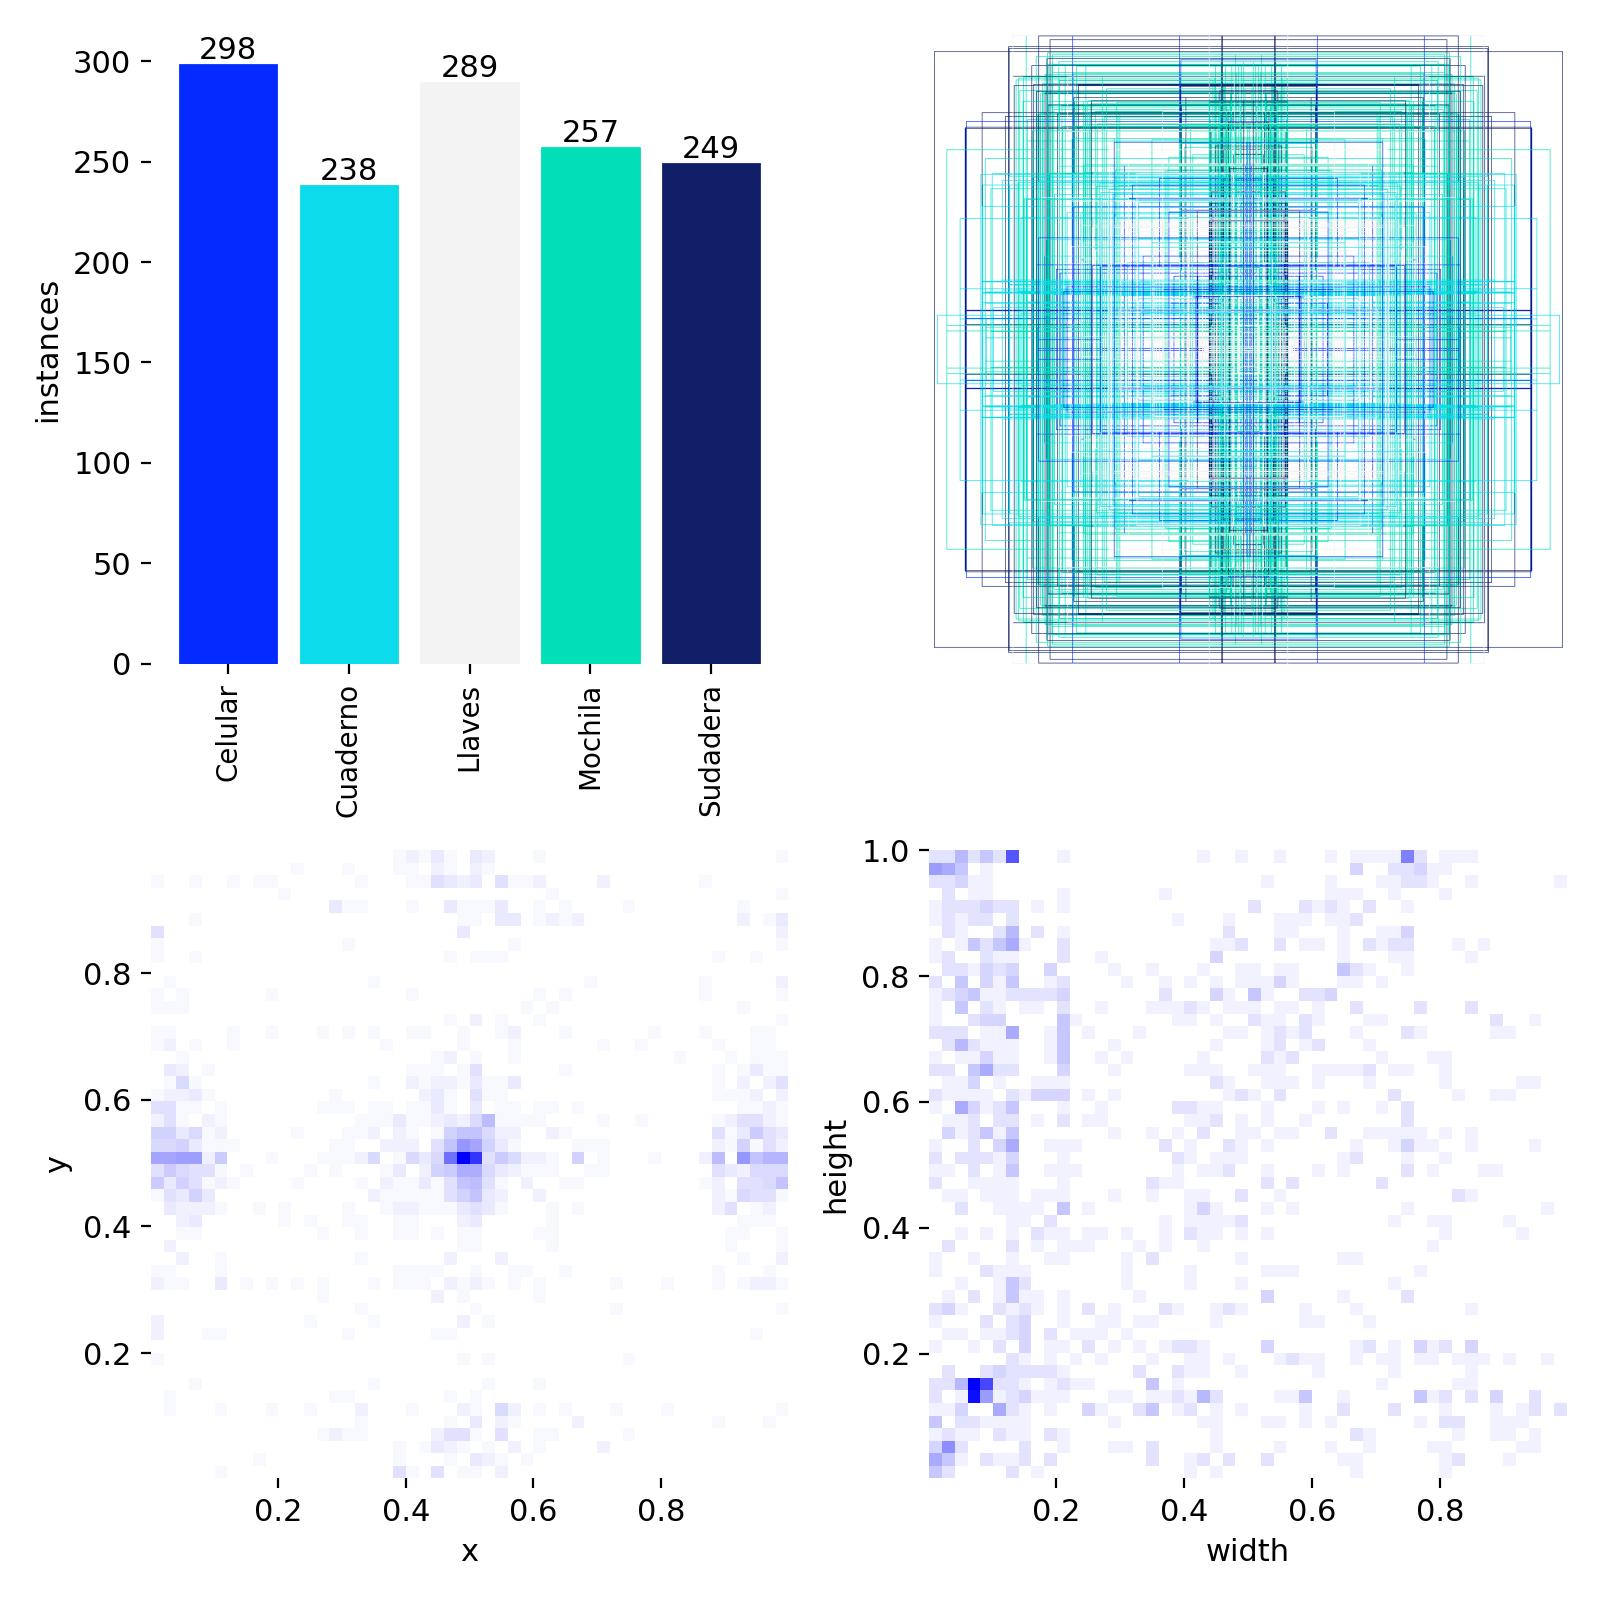

Advertencia: labels_correlogram.jpg no encontrado en /content/runs/detect/train3


In [27]:
import os
from IPython.display import Image, display


train5_dir = '/content/runs/detect/train3'


image_files = [
    'results.png',
    'F1_curve.png',
    'confusion_matrix.png',
    'confusion_matrix_normalized.png',
    'labels.jpg',
    'labels_correlogram.jpg'
]

print(f"Visualizando resultados del entrenamiento: {train5_dir}")
for img_file in image_files:
    img_path = os.path.join(train5_dir, img_file)
    if os.path.exists(img_path):
        print(f"\n--- Mostrando {img_file} ---")
        display(Image(filename=img_path, width=800))
    else:
        print(f"Advertencia: {img_file} no encontrado en {train5_dir}")